In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import re
from datetime import date

In [2]:
df = pd.read_csv('results_jobstreet_datascientist.csv')

In [3]:
df_copy = df.copy(deep = True)

In [4]:
df.head()

,Job Title,Companies,Pay,Location,Date posted,Other information,Job Description
0,Sales Operations and Installed Base Data Analyst,Howden,NaN,Central,Posted on 11-Sep-21,"Dynamic, innovative, global company - APPLY N...","<div class=""vDEj0_0"" data-automation=""jobDescr..."
1,Data Analyst - Financial Markets,AMUNDI SINGAPORE LIMITED,"SGD 3,000 - SGD 5,000",Singapore River,Posted on 6-Sep-21,"Entry Level Bachelor's Degree, Post Graduate D...","<div class=""vDEj0_0"" data-automation=""jobDescr..."
2,Food Scientist,Organic Technology SE-ASIA Pte Ltd,"SGD 3,000 - SGD 5,000",West,Posted on 6-Sep-21,"International environment, awesome colleagues...","<div class=""vDEj0_0"" data-automation=""jobDescr..."
3,Data Scientist,Singapore Pools (Private) Limited,NaN,Central,Posted 23 hours ago,Excellent Benefits Learning Organisation Gi...,"<div class=""vDEj0_0"" data-automation=""jobDescr..."
4,Scientist I/II,"Agency for Science, Technology and Research (A...",NaN,Singapore,Posted 8 hours ago,"Junior Executive Bachelor's Degree, Post Gradu...","<div class=""vDEj0_0"" data-automation=""jobDescr..."


In [5]:
list(df.columns)

['Job Title',
 'Companies',
 'Pay',
 'Location',
 'Date posted',
 'Other information',
 'Job Description']

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Job Title          1500 non-null   object
 1   Companies          1500 non-null   object
 2   Pay                320 non-null    object
 3   Location           1495 non-null   object
 4   Date posted        1500 non-null   object
 5   Other information  1500 non-null   object
 6   Job Description    1500 non-null   object
dtypes: object(7)
memory usage: 82.2+ KB


Checking for missing values

<AxesSubplot:>

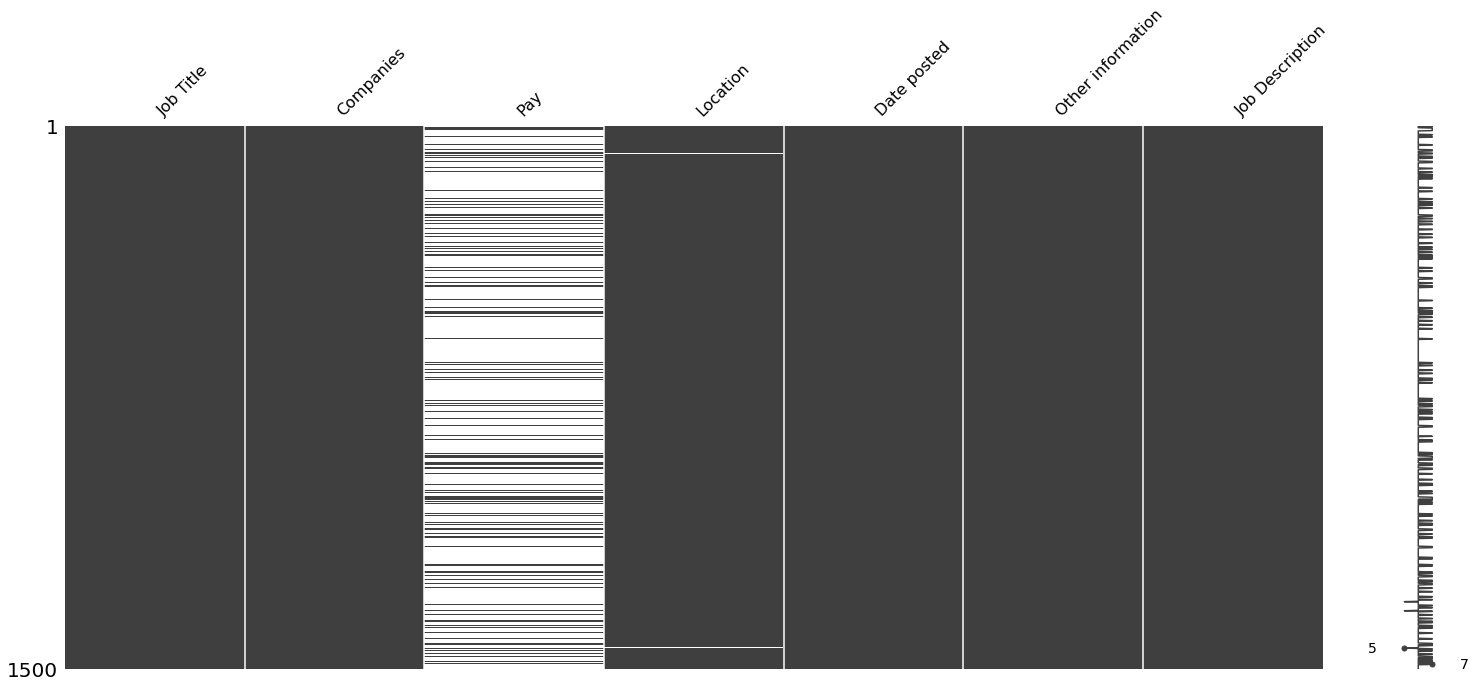

In [7]:
msno.matrix(df)

In [8]:
#check the entry for missing location
df[df['Location'].isnull()]

,Job Title,Companies,Pay,Location,Date posted,Other information,Job Description
78,"Manager, Engineering Data Analysis (Data Science)",Marina Bay Sands Pte Ltd,"SGD 5,000 - SGD 6,000",NaN,Posted on 10-Sep-21,"Manager Bachelor's Degree Sciences, Actuarial/...","<div class=""vDEj0_0"" data-automation=""jobDescr..."
857,Research Engineer (Machine Learning/Image Anal...,Singapore Institute of Technology,"SGD 2,800 - SGD 4,000",NaN,Posted on 6-Sep-21,Junior Executive Bachelor's Degree Education/T...,"<div class=""vDEj0_0"" data-automation=""jobDescr..."
1312,"Data Analyst, Ecommerce",Marina Bay Sands Pte Ltd,NaN,NaN,Posted on 24-Aug-21,Senior Executive Bachelor's Degree Sales/Marke...,"<div class=""vDEj0_0"" data-automation=""jobDescr..."
1337,Research Engineer (Machine Learning) - LKK2,Singapore Institute of Technology,NaN,NaN,Posted on 31-Aug-21,Senior Executive Bachelor's Degree Computer/In...,"<div class=""vDEj0_0"" data-automation=""jobDescr..."
1440,Senior Big Data Developer (Hadoop),Marina Bay Sands Pte Ltd,NaN,NaN,Posted on 2-Sep-21,Senior Executive Advanced/Higher/Graduate Dipl...,"<div class=""vDEj0_0"" data-automation=""jobDescr..."


In [9]:
df.Location.fillna('Singapore', inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Job Title          1500 non-null   object
 1   Companies          1500 non-null   object
 2   Pay                320 non-null    object
 3   Location           1500 non-null   object
 4   Date posted        1500 non-null   object
 5   Other information  1500 non-null   object
 6   Job Description    1500 non-null   object
dtypes: object(7)
memory usage: 82.2+ KB


## Pay

I noticed that some information on Pay is in the location column 

In [11]:
df.head()

,Job Title,Companies,Pay,Location,Date posted,Other information,Job Description
0,Sales Operations and Installed Base Data Analyst,Howden,NaN,Central,Posted on 11-Sep-21,"Dynamic, innovative, global company - APPLY N...","<div class=""vDEj0_0"" data-automation=""jobDescr..."
1,Data Analyst - Financial Markets,AMUNDI SINGAPORE LIMITED,"SGD 3,000 - SGD 5,000",Singapore River,Posted on 6-Sep-21,"Entry Level Bachelor's Degree, Post Graduate D...","<div class=""vDEj0_0"" data-automation=""jobDescr..."
2,Food Scientist,Organic Technology SE-ASIA Pte Ltd,"SGD 3,000 - SGD 5,000",West,Posted on 6-Sep-21,"International environment, awesome colleagues...","<div class=""vDEj0_0"" data-automation=""jobDescr..."
3,Data Scientist,Singapore Pools (Private) Limited,NaN,Central,Posted 23 hours ago,Excellent Benefits Learning Organisation Gi...,"<div class=""vDEj0_0"" data-automation=""jobDescr..."
4,Scientist I/II,"Agency for Science, Technology and Research (A...",NaN,Singapore,Posted 8 hours ago,"Junior Executive Bachelor's Degree, Post Gradu...","<div class=""vDEj0_0"" data-automation=""jobDescr..."


In [12]:
#I replace it with a string so i can perform string operations in column
df.Pay.fillna('temp', inplace=True)

In [13]:
df.head()

,Job Title,Companies,Pay,Location,Date posted,Other information,Job Description
0,Sales Operations and Installed Base Data Analyst,Howden,temp,Central,Posted on 11-Sep-21,"Dynamic, innovative, global company - APPLY N...","<div class=""vDEj0_0"" data-automation=""jobDescr..."
1,Data Analyst - Financial Markets,AMUNDI SINGAPORE LIMITED,"SGD 3,000 - SGD 5,000",Singapore River,Posted on 6-Sep-21,"Entry Level Bachelor's Degree, Post Graduate D...","<div class=""vDEj0_0"" data-automation=""jobDescr..."
2,Food Scientist,Organic Technology SE-ASIA Pte Ltd,"SGD 3,000 - SGD 5,000",West,Posted on 6-Sep-21,"International environment, awesome colleagues...","<div class=""vDEj0_0"" data-automation=""jobDescr..."
3,Data Scientist,Singapore Pools (Private) Limited,temp,Central,Posted 23 hours ago,Excellent Benefits Learning Organisation Gi...,"<div class=""vDEj0_0"" data-automation=""jobDescr..."
4,Scientist I/II,"Agency for Science, Technology and Research (A...",temp,Singapore,Posted 8 hours ago,"Junior Executive Bachelor's Degree, Post Gradu...","<div class=""vDEj0_0"" data-automation=""jobDescr..."


In [14]:
#I will seperate the pay into lower and upper bound
#Removing currency first
df.Pay = df.Pay.apply(lambda x : x.replace('SGD',''))
df.Pay = df.Pay.apply(lambda x : x.replace('- ',''))
df.Pay = df.Pay.apply(lambda x : x.replace(' ',''))
df.Pay = df.Pay.apply(lambda x : x.replace(',',''))

In [15]:
df['Pay_lower_bound'] = 0

In [16]:
df.head()

,Job Title,Companies,Pay,Location,Date posted,Other information,Job Description,Pay_lower_bound
0,Sales Operations and Installed Base Data Analyst,Howden,temp,Central,Posted on 11-Sep-21,"Dynamic, innovative, global company - APPLY N...","<div class=""vDEj0_0"" data-automation=""jobDescr...",0
1,Data Analyst - Financial Markets,AMUNDI SINGAPORE LIMITED,3000 5000,Singapore River,Posted on 6-Sep-21,"Entry Level Bachelor's Degree, Post Graduate D...","<div class=""vDEj0_0"" data-automation=""jobDescr...",0
2,Food Scientist,Organic Technology SE-ASIA Pte Ltd,3000 5000,West,Posted on 6-Sep-21,"International environment, awesome colleagues...","<div class=""vDEj0_0"" data-automation=""jobDescr...",0
3,Data Scientist,Singapore Pools (Private) Limited,temp,Central,Posted 23 hours ago,Excellent Benefits Learning Organisation Gi...,"<div class=""vDEj0_0"" data-automation=""jobDescr...",0
4,Scientist I/II,"Agency for Science, Technology and Research (A...",temp,Singapore,Posted 8 hours ago,"Junior Executive Bachelor's Degree, Post Gradu...","<div class=""vDEj0_0"" data-automation=""jobDescr...",0


In [17]:
df['Pay_lower_bound'] = df.Pay.apply(lambda x : x[0:int(len(x)/2)])
df['Pay_upper_bound'] = df.Pay.apply(lambda x : x[int(len(x)/2):])
df.drop(columns='Pay', inplace = True)

In [18]:
df.head()

,Job Title,Companies,Location,Date posted,Other information,Job Description,Pay_lower_bound,Pay_upper_bound
0,Sales Operations and Installed Base Data Analyst,Howden,Central,Posted on 11-Sep-21,"Dynamic, innovative, global company - APPLY N...","<div class=""vDEj0_0"" data-automation=""jobDescr...",te,mp
1,Data Analyst - Financial Markets,AMUNDI SINGAPORE LIMITED,Singapore River,Posted on 6-Sep-21,"Entry Level Bachelor's Degree, Post Graduate D...","<div class=""vDEj0_0"" data-automation=""jobDescr...",3000,5000
2,Food Scientist,Organic Technology SE-ASIA Pte Ltd,West,Posted on 6-Sep-21,"International environment, awesome colleagues...","<div class=""vDEj0_0"" data-automation=""jobDescr...",3000,5000
3,Data Scientist,Singapore Pools (Private) Limited,Central,Posted 23 hours ago,Excellent Benefits Learning Organisation Gi...,"<div class=""vDEj0_0"" data-automation=""jobDescr...",te,mp
4,Scientist I/II,"Agency for Science, Technology and Research (A...",Singapore,Posted 8 hours ago,"Junior Executive Bachelor's Degree, Post Gradu...","<div class=""vDEj0_0"" data-automation=""jobDescr...",te,mp


In [19]:
df.Pay_lower_bound = df.Pay_lower_bound.apply(lambda x : x.replace('te',"NaN"))

In [20]:
df.Pay_upper_bound = df.Pay_upper_bound.apply(lambda x : x.replace('mp',"NaN"))

In [21]:
df.head()

,Job Title,Companies,Location,Date posted,Other information,Job Description,Pay_lower_bound,Pay_upper_bound
0,Sales Operations and Installed Base Data Analyst,Howden,Central,Posted on 11-Sep-21,"Dynamic, innovative, global company - APPLY N...","<div class=""vDEj0_0"" data-automation=""jobDescr...",NaN,NaN
1,Data Analyst - Financial Markets,AMUNDI SINGAPORE LIMITED,Singapore River,Posted on 6-Sep-21,"Entry Level Bachelor's Degree, Post Graduate D...","<div class=""vDEj0_0"" data-automation=""jobDescr...",3000,5000
2,Food Scientist,Organic Technology SE-ASIA Pte Ltd,West,Posted on 6-Sep-21,"International environment, awesome colleagues...","<div class=""vDEj0_0"" data-automation=""jobDescr...",3000,5000
3,Data Scientist,Singapore Pools (Private) Limited,Central,Posted 23 hours ago,Excellent Benefits Learning Organisation Gi...,"<div class=""vDEj0_0"" data-automation=""jobDescr...",NaN,NaN
4,Scientist I/II,"Agency for Science, Technology and Research (A...",Singapore,Posted 8 hours ago,"Junior Executive Bachelor's Degree, Post Gradu...","<div class=""vDEj0_0"" data-automation=""jobDescr...",NaN,NaN


<AxesSubplot:>

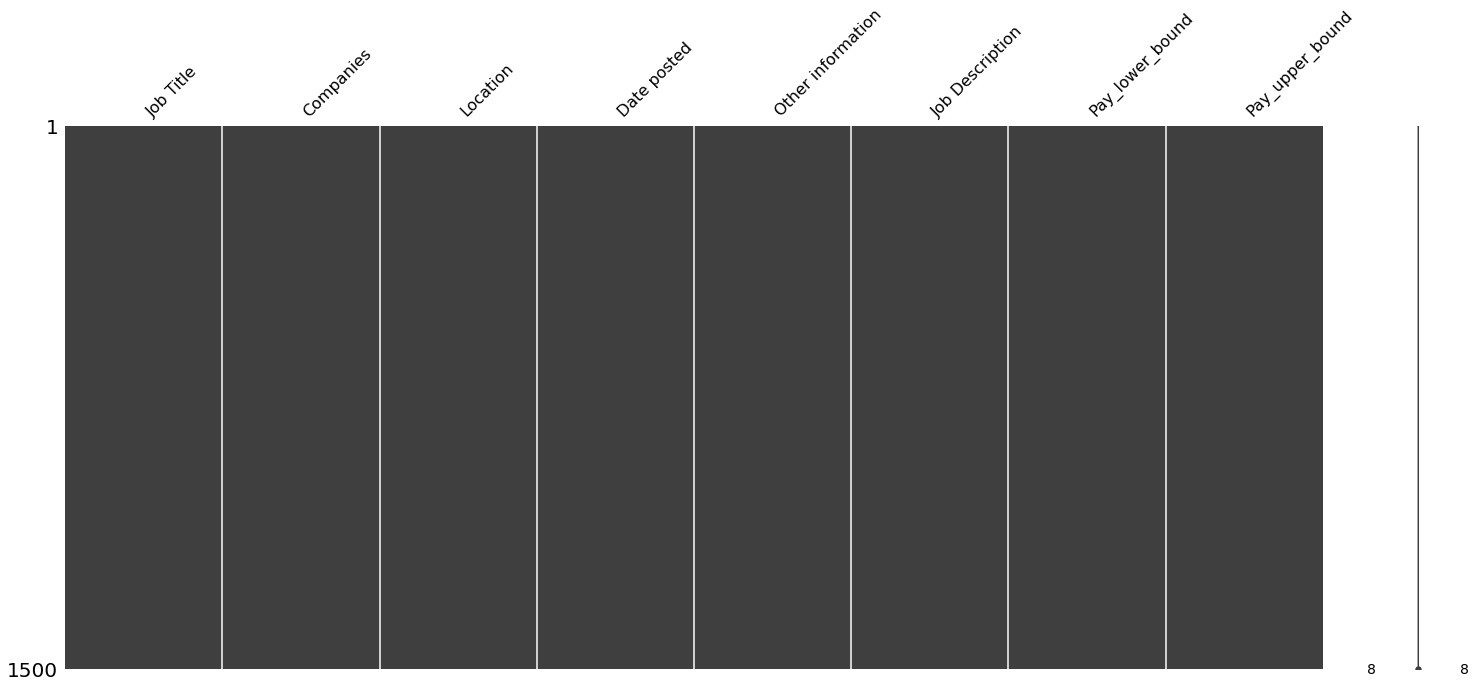

In [22]:
msno.matrix(df)

In [23]:
df.head()

,Job Title,Companies,Location,Date posted,Other information,Job Description,Pay_lower_bound,Pay_upper_bound
0,Sales Operations and Installed Base Data Analyst,Howden,Central,Posted on 11-Sep-21,"Dynamic, innovative, global company - APPLY N...","<div class=""vDEj0_0"" data-automation=""jobDescr...",NaN,NaN
1,Data Analyst - Financial Markets,AMUNDI SINGAPORE LIMITED,Singapore River,Posted on 6-Sep-21,"Entry Level Bachelor's Degree, Post Graduate D...","<div class=""vDEj0_0"" data-automation=""jobDescr...",3000,5000
2,Food Scientist,Organic Technology SE-ASIA Pte Ltd,West,Posted on 6-Sep-21,"International environment, awesome colleagues...","<div class=""vDEj0_0"" data-automation=""jobDescr...",3000,5000
3,Data Scientist,Singapore Pools (Private) Limited,Central,Posted 23 hours ago,Excellent Benefits Learning Organisation Gi...,"<div class=""vDEj0_0"" data-automation=""jobDescr...",NaN,NaN
4,Scientist I/II,"Agency for Science, Technology and Research (A...",Singapore,Posted 8 hours ago,"Junior Executive Bachelor's Degree, Post Gradu...","<div class=""vDEj0_0"" data-automation=""jobDescr...",NaN,NaN


In [24]:
df.Pay_lower_bound = df.Pay_lower_bound.apply(lambda x : float(x))

In [25]:
df.head()

,Job Title,Companies,Location,Date posted,Other information,Job Description,Pay_lower_bound,Pay_upper_bound
0,Sales Operations and Installed Base Data Analyst,Howden,Central,Posted on 11-Sep-21,"Dynamic, innovative, global company - APPLY N...","<div class=""vDEj0_0"" data-automation=""jobDescr...",NaN,NaN
1,Data Analyst - Financial Markets,AMUNDI SINGAPORE LIMITED,Singapore River,Posted on 6-Sep-21,"Entry Level Bachelor's Degree, Post Graduate D...","<div class=""vDEj0_0"" data-automation=""jobDescr...",3000.0,5000
2,Food Scientist,Organic Technology SE-ASIA Pte Ltd,West,Posted on 6-Sep-21,"International environment, awesome colleagues...","<div class=""vDEj0_0"" data-automation=""jobDescr...",3000.0,5000
3,Data Scientist,Singapore Pools (Private) Limited,Central,Posted 23 hours ago,Excellent Benefits Learning Organisation Gi...,"<div class=""vDEj0_0"" data-automation=""jobDescr...",NaN,NaN
4,Scientist I/II,"Agency for Science, Technology and Research (A...",Singapore,Posted 8 hours ago,"Junior Executive Bachelor's Degree, Post Gradu...","<div class=""vDEj0_0"" data-automation=""jobDescr...",NaN,NaN


In [26]:
df.Pay_upper_bound = df.Pay_upper_bound.apply(lambda x : float(x))

In [27]:
df

,Job Title,Companies,Location,Date posted,Other information,Job Description,Pay_lower_bound,Pay_upper_bound
0,Sales Operations and Installed Base Data Analyst,Howden,Central,Posted on 11-Sep-21,"Dynamic, innovative, global company - APPLY N...","<div class=""vDEj0_0"" data-automation=""jobDescr...",NaN,NaN
1,Data Analyst - Financial Markets,AMUNDI SINGAPORE LIMITED,Singapore River,Posted on 6-Sep-21,"Entry Level Bachelor's Degree, Post Graduate D...","<div class=""vDEj0_0"" data-automation=""jobDescr...",3000.0,5000.0
2,Food Scientist,Organic Technology SE-ASIA Pte Ltd,West,Posted on 6-Sep-21,"International environment, awesome colleagues...","<div class=""vDEj0_0"" data-automation=""jobDescr...",3000.0,5000.0
3,Data Scientist,Singapore Pools (Private) Limited,Central,Posted 23 hours ago,Excellent Benefits Learning Organisation Gi...,"<div class=""vDEj0_0"" data-automation=""jobDescr...",NaN,NaN
4,Scientist I/II,"Agency for Science, Technology and Research (A...",Singapore,Posted 8 hours ago,"Junior Executive Bachelor's Degree, Post Gradu...","<div class=""vDEj0_0"" data-automation=""jobDescr...",NaN,NaN
...,...,...,...,...,...,...,...,...
1495,DATA ANALYST - GLOBAL MNC IN FMCG INDUSTRY,HR Factors Personnel Pte Ltd,Central,Posted on 30-Aug-21,"Junior Executive Bachelor's Degree, Post Gradu...","<div class=""vDEj0_0"" data-automation=""jobDescr...",NaN,NaN
1496,Senior Image Processing Algorithm Engineer,Borries Pte Ltd,Singapore,Posted on 31-Aug-21,Competitive remuneration Flexible benefits w...,"<div class=""vDEj0_0"" data-automation=""jobDescr...",NaN,NaN
1497,"Executive, Policy & Planning (1-Year Contract)",Singapore Health Services Pte Ltd (SingHealth HQ),Bukit Merah,Posted on 5-Sep-21,Junior Executive Not Specified Contract Admin/...,"<div class=""vDEj0_0"" data-automation=""jobDescr...",NaN,NaN
1498,Senior / Data Analyst,ST Engineering Aerospace Ltd,Singapore,Posted on 24-Aug-21,"Junior Executive Bachelor's Degree, Post Gradu...","<div class=""vDEj0_0"" data-automation=""jobDescr...",NaN,NaN


In [28]:
def find_average(x,y):
    return (x+y)/2

In [29]:
df['Pay_average']=(df['Pay_lower_bound'] + df['Pay_upper_bound'])/2

In [30]:
df.drop(columns = ['Pay_lower_bound','Pay_upper_bound'], inplace = True)

In [31]:
df['Job Title'] = df['Job Title'].astype(str)
df['Companies'] = df['Companies'].astype(str)
df['Other information'] = df['Other information'].astype(str)
df['Job Description'] = df['Job Description'].astype(str)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          1500 non-null   object 
 1   Companies          1500 non-null   object 
 2   Location           1500 non-null   object 
 3   Date posted        1500 non-null   object 
 4   Other information  1500 non-null   object 
 5   Job Description    1500 non-null   object 
 6   Pay_average        320 non-null    float64
dtypes: float64(1), object(6)
memory usage: 82.2+ KB


In [33]:
df.head()

,Job Title,Companies,Location,Date posted,Other information,Job Description,Pay_average
0,Sales Operations and Installed Base Data Analyst,Howden,Central,Posted on 11-Sep-21,"Dynamic, innovative, global company - APPLY N...","<div class=""vDEj0_0"" data-automation=""jobDescr...",NaN
1,Data Analyst - Financial Markets,AMUNDI SINGAPORE LIMITED,Singapore River,Posted on 6-Sep-21,"Entry Level Bachelor's Degree, Post Graduate D...","<div class=""vDEj0_0"" data-automation=""jobDescr...",4000.0
2,Food Scientist,Organic Technology SE-ASIA Pte Ltd,West,Posted on 6-Sep-21,"International environment, awesome colleagues...","<div class=""vDEj0_0"" data-automation=""jobDescr...",4000.0
3,Data Scientist,Singapore Pools (Private) Limited,Central,Posted 23 hours ago,Excellent Benefits Learning Organisation Gi...,"<div class=""vDEj0_0"" data-automation=""jobDescr...",NaN
4,Scientist I/II,"Agency for Science, Technology and Research (A...",Singapore,Posted 8 hours ago,"Junior Executive Bachelor's Degree, Post Gradu...","<div class=""vDEj0_0"" data-automation=""jobDescr...",NaN


In [34]:
df['Job Description'][0]

'<div class="vDEj0_0" data-automation="jobDescription"><span class="sx2jih0 zcydq82q _18qlyvc0 _18qlyvcv _18qlyvc1 _18qlyvc8"><div class="sx2jih0"><p><strong>The Big Picture:</strong></p><p>Howden Singapore has an immediate need for a detail driven analyst to fulfill the exciting new role of Sales Operations and Installed Base Data Analyst for the Howden APAC region.</p><p>Your main responsibilities will include:</p><ul><li>Delivering all data analytics and work programs to support Howden APAC in its general sales operations and marketing sales initiatives.</li><li>Preparing sales and marketing reports and data for the APAC leadership team as part of our regular commercial operating rhythm and for ad-hoc strategic and market analysis.</li><li>Driving the analytics and updates around Howden’s installed base of compressors, fans, heaters and steam turbines across the region.</li><li>Working with key internal and external stakeholders to assist in sales and marketing efforts.</li><li>Bein

In [35]:
def cleanup_jobdescription(jd_string):
    html_tags_regex = re.compile(r'(\xa0)|(<.*?>)')
    return re.sub(html_tags_regex, '', jd_string)

In [36]:
cleanup_jobdescription(df['Job Description'][0])

"The Big Picture:Howden Singapore has an immediate need for a detail driven analyst to fulfill the exciting new role of Sales Operations and Installed Base Data Analyst for the Howden APAC region.Your main responsibilities will include:Delivering all data analytics and work programs to support Howden APAC in its general sales operations and marketing sales initiatives.Preparing sales and marketing reports and data for the APAC leadership team as part of our regular commercial operating rhythm and for ad-hoc strategic and market analysis.Driving the analytics and updates around Howden’s installed base of compressors, fans, heaters and steam turbines across the region.Working with key internal and external stakeholders to assist in sales and marketing efforts.Being the point of contact for all sales data analysis coming from the region and the Product Business Units.This is your opportunity to join a dynamic, innovative, global company that offers attractive remuneration packages, annual

In [37]:
df['Job Description'] = df['Job Description'].apply(cleanup_jobdescription)

In [38]:
df['Job Description'].sample(10)

1196    The College of Science seeks a diverse and inc...
889     If you are passionate about building great pro...
1304    SummaryDo you love music? Movies? Are you pass...
1038    The Cell Line Development group at Bioprocessi...
1248    The Singapore Centre for Environmental Life Sc...
262     A Research Assistant position is currently ava...
551     RESPONSIBILITIES:- Translate customer pain-poi...
1035    Consolidation and to conduct data cleansing ac...
1080    Center for Research &amp; Development in Learn...
38      As a Business Data Analyst / Operation Finance...
Name: Job Description, dtype: object

In [39]:
df.head()

,Job Title,Companies,Location,Date posted,Other information,Job Description,Pay_average
0,Sales Operations and Installed Base Data Analyst,Howden,Central,Posted on 11-Sep-21,"Dynamic, innovative, global company - APPLY N...",The Big Picture:Howden Singapore has an immedi...,NaN
1,Data Analyst - Financial Markets,AMUNDI SINGAPORE LIMITED,Singapore River,Posted on 6-Sep-21,"Entry Level Bachelor's Degree, Post Graduate D...",Job descriptionYou will be part of the Data Sc...,4000.0
2,Food Scientist,Organic Technology SE-ASIA Pte Ltd,West,Posted on 6-Sep-21,"International environment, awesome colleagues...",Part time role(3 days per week) and will suppo...,4000.0
3,Data Scientist,Singapore Pools (Private) Limited,Central,Posted 23 hours ago,Excellent Benefits Learning Organisation Gi...,We are looking for a passionate and profession...,NaN
4,Scientist I/II,"Agency for Science, Technology and Research (A...",Singapore,Posted 8 hours ago,"Junior Executive Bachelor's Degree, Post Gradu...",﻿The officer will be required to but not exclu...,NaN


In [40]:
df.describe()

,Pay_average
count,320.000000
mean,4991.843750
std,1366.246101
min,2300.000000
25%,3818.750000
50%,5000.000000
75%,6000.000000
max,8250.000000


Cleaning up Posted on

In [41]:
def cleanup_posted(posted_string):
    date_regex = re.compile(r'Posted on |Posted ')
    return re.sub(date_regex, '', posted_string)

In [42]:
df['Date posted'] = df['Date posted'].apply(cleanup_posted)

In [43]:
df['Date posted'].sample(10)

118        9-Sep-21
312        6-Sep-21
215       10-Sep-21
386        6-Sep-21
457     9 hours ago
1452      26-Aug-21
1359       4-Sep-21
116       10-Sep-21
511     9 hours ago
1267       9-Sep-21
Name: Date posted, dtype: object

In [44]:
df['Date posted'] = pd.to_datetime(df['Date posted'], errors='coerce')

In [45]:
df['Date posted']

0      2021-09-11
1      2021-09-06
2      2021-09-06
3             NaT
4             NaT
          ...    
1495   2021-08-30
1496   2021-08-31
1497   2021-09-05
1498   2021-08-24
1499   2021-08-23
Name: Date posted, Length: 1500, dtype: datetime64[ns]

In [46]:
df['Date posted'].fillna(date.today())

0       2021-09-11 00:00:00
1       2021-09-06 00:00:00
2       2021-09-06 00:00:00
3                2021-09-16
4                2021-09-16
               ...         
1495    2021-08-30 00:00:00
1496    2021-08-31 00:00:00
1497    2021-09-05 00:00:00
1498    2021-08-24 00:00:00
1499    2021-08-23 00:00:00
Name: Date posted, Length: 1500, dtype: object

In [47]:
df['Other information'].sample(10)

1290    Manager Bachelor's Degree, Post Graduate Diplo...
599     Junior Executive Diploma, Advanced/Higher/Grad...
905     Junior Executive Doctorate (PhD) 1 year Full-T...
658     Junior Executive Bachelor's Degree, Post Gradu...
543     Manager Professional Certificate/NiTEC 3 years...
1232    Junior Executive Doctorate (PhD) 3 years Engin...
587     Senior Executive Diploma, Advanced/Higher/Grad...
1168    Junior Executive Doctorate (PhD) 1 year Full-T...
1464    Senior Manager Master's Degree, Doctorate (PhD...
20      Junior Executive Doctorate (PhD) 1 year Full-T...
Name: Other information, dtype: object

Right now all of the information is more or less settled except for the strings in the Job Description and the other information where qualifications, information on the company is provided<br>
The information that i want to capture are<br> <li>the skills needed - Sklearn, Spark, Computer Vision, etc<li>the number of years the job requires<li>qualification needed<li>Job Description

In [48]:
df.sample(10)

,Job Title,Companies,Location,Date posted,Other information,Job Description,Pay_average
841,"Research Associate (Antibody Biology), EDDC","Agency for Science, Technology and Research (A...",Singapore,2021-09-02,"Junior Executive Bachelor's Degree, Post Gradu...","The antibody biology, which is part of discove...",NaN
1009,Research Fellow #SGUnitedJobs #RIE - R00006359,Nanyang Technological University,Singapore,2021-09-10,"Junior Executive Bachelor's Degree, Post Gradu...",Programme SummaryThe new Work and Skills Immer...,NaN
1312,"Data Analyst, Ecommerce",Marina Bay Sands Pte Ltd,Singapore,2021-08-24,Senior Executive Bachelor's Degree Sales/Marke...,JOB SCOPEThe Analyst will conduct robust analy...,NaN
1290,Area Continuous Improvement Lead (CX and Digit...,A.P. Moller - Maersk,Kuala Lumpur,2021-09-08,"Manager Bachelor's Degree, Post Graduate Diplo...",We are looking for :Area Continuous Improvemen...,NaN
96,Data Analytics Architect,Michael Page,Singapore,2021-09-10,"Manager Diploma, Advanced/Higher/Graduate Dipl...",An interesting opportunity to work with a lead...,NaN
718,"Internal Audit Manager, DA & Robotics",Singapore Telecommunications Limited,Singapore,2021-09-06,"Manager Bachelor's Degree, Post Graduate Diplo...",Job ResponsibilitiesPerforming more complex da...,NaN
346,Data Analyst Engineer,Manpower Staffing Services (S) Pte Ltd - IT Co...,Singapore,2021-09-03,"Junior Executive Bachelor's Degree, Post Gradu...",Responsibilities:Work with business users and ...,NaN
350,Staff Data Engineer,Singapore Telecommunications Limited,Singapore,2021-09-06,"Senior Executive Bachelor's Degree, Post Gradu...","Singtel, Asia’s leading communications technol...",NaN
166,Quality Assurance Engineer (Data Platform),PERSOLKELLY Singapore Pte Ltd (Formerly Kelly ...,Central,2021-09-11,Junior Executive Professional Certificate/NiTE...,Descriptions:You will be part of the talented ...,NaN
108,[#SGUnitedTraineeships] [#SGUP] Trainee in Dat...,Nanyang Technological University,Singapore,2021-09-10,"Entry Level Bachelor's Degree, Post Graduate D...",Programme SummaryWith the release of Enhanced ...,NaN


In [49]:
for i in range(0,5):
    print(df['Other information'][i])

 Dynamic, innovative, global company - APPLY NOW - DON'T DELAY!  Attractive remuneration packages & flexible working arrangements  Exciting new role! Junior Executive Bachelor's Degree, Post Graduate Diploma, Professional Degree 3 years Full-Time Sales/Marketing, Marketing/Business Dev 199106158K 51 - 200 Employees 4 days Others Medical, Regular hours, Mondays - Fridays, Business (e.g. Shirts)
Entry Level Bachelor's Degree, Post Graduate Diploma, Professional Degree Contract Accounting/Finance, Banking/Financial 198900774E 51 - 200 Employees 8 days Banking / Financial Services Regular hours, Mondays - Fridays, Business (Mondays - Thursdays), Business Casual (Fridays) Raffles Place
 International environment, awesome colleagues Entry Level Bachelor's Degree, Post Graduate Diploma, Professional Degree 2 years Part-Time Sciences, Food Tech/Nutritionist 201927214M Others Mapletree Business City
 Excellent Benefits  Learning Organisation  Giving back to the Community Junior Executive Bachel

In [50]:
list(df.sample(5)['Other information'])

["Junior Executive Diploma, Advanced/Higher/Graduate Diploma, Bachelor's Degree, Post Graduate Diploma, Professional Degree, Master's Degree 3 years Full-Time Sciences, Actuarial/Statistics, Manufacturing, Purchasing/Material Mgmt 201201679C More than 5000 Employees 25 days Computer / Information Technology (Software) Regular hours, Mondays - Fridays, Casual (e.g. T-shirts)",
 " Opportunity to build systems that can impact healthcare globally  Innovative Technology to enable quality Eldercare Service  Lead team of engineers and grow a dynamic and promising start up Entry Level Diploma, Advanced/Higher/Graduate Diploma, Bachelor's Degree, Post Graduate Diploma, Professional Degree Full-Time Computer/Information Technology, IT-Software 201504389K 1 - 50 Employees Computer / Information Technology (Software) Medical, Regular hours, Mondays - Fridays, Presentable Paya Lebar",
 "Manager Bachelor's Degree, Post Graduate Diploma, Professional Degree 6 years Full-Time Accounting/Finance, Gener

It appears that most of the information in other information follows the following format<br>
<li>Company information if available
<li>Position Level (entry, junior/Senior Exec, etc)
<li>Qualifications
<li>Years of Experience
<li>position type (Full time, contract, part time)


In [51]:
qualification_list = ('Professional Certificate', 'NiTEC ', "Bachelor's Degree", 'Diploma', 'Advanced/Higher/Graduate Diploma', 'Post Graduate Diploma' , 'Professional Degree', "Master's Degree" , 'Doctorate (PhD)',
                     'Primary/Secondary School/O Level')
position_list = ('Non-Executive','Entry Level', 'Junior Executive' , 'Senior Executive', 'Manager', 'Senior Manager')
employment_type_list = ('Full-Time', 'Part-Time', 'Contract',)

In [52]:
print(df['Job Description'][80])

Job PurposeReporting to the Lead of Data Science, this role is responsible to ensure the successful delivery of group wide data science initiatives. These initiatives typically include the application of data science models on structured, semi structured and unstructured data to derive business insights with a potential to drive business performance.The Senior Data Scientist is expected to work closely with key stakeholders and possess the relevant technical skills required to implement analytics solutions that enable the use of data as a strategic asset.The JobParticipate in the build of group wide data science capabilities, with a focus on organizing, analysing and interpreting data to uncover patterns and trends and establishing how these findings can help increase business value through making better informed decisions.Perform exploratory data analysis, build and enhance data science models to help drive business performance.Work closely with business stakeholders to drive integrat

In [53]:
def returnhits(a_list, x):
    return(' , '.join(a for a in a_list if a in x))

In [54]:
#Qualification is meant to contain the qualification bit in the Other Information
df['Qualifications'] = df['Other information'].apply(lambda x : returnhits(qualification_list, x))
df['Position'] = df['Other information'].apply(lambda x : returnhits(position_list, x))
df['Employment Type'] = df['Other information'].apply(lambda x : returnhits(employment_type_list, x))

In [55]:
list(df[df['Position'] == ""]['Other information'])

[]

In [56]:
df['Position'] = df['Position'].apply(lambda x : x.replace("","Not indicated") if x =='' else x)

Checking if the qualification is in other information for those that remain empty

In [57]:
list(df[df['Qualifications'] == ""]['Other information'])

['Junior Executive Not Specified 2 years Full-Time Computer/Information Technology, IT-Software 200723468K More than 5000 Employees 9 days Computer / Information Technology (Software) Regular hours, Mondays - Fridays',
 'Junior Executive Not Specified Full-Time Sciences, Actuarial/Statistics 198703907Z More than 5000 Employees 21 days Healthcare / Medical Dental, Medical, Sports (e.g. Gym), Business (e.g. Shirts), Leave benefits, 42 hours',
 'Entry Level Not Specified Full-Time Computer/Information Technology, IT-Software 200723468K More than 5000 Employees 9 days Computer / Information Technology (Software) Regular hours, Mondays - Fridays',
 'Senior Executive Not Specified 3 years Full-Time Computer/Information Technology, IT-Software 201300296D 201 - 500 Employees 25 days Retail / Merchandise Casual (e.g. T-shirts) Buona Vista',
 ' Employee Stock Ownership Plan  Experienced team  100% remote work forever Senior Executive Not Specified 3 years Full-Time Computer/Information Technolog

In [58]:
df['Qualifications'] = df['Qualifications'].apply(lambda x : x.replace("","Not indicated") if x =='' else x)

In [59]:
list(df[df['Employment Type'] == ""]['Other information'])

["Manager Bachelor's Degree Sciences, Actuarial/Statistics 200507292R More than 5000 Employees Hotel / Hospitality",
 'Senior Manager Doctorate (PhD) 1 year Sciences, Science & Technology 53374847W 51 - 200 Employees 30 days R&D Dental, Medical, Regular hours, Mondays - Fridays, Casual (e.g. T-shirts) Singapore',
 "Junior Executive Master's Degree Computer/Information Technology, IT-Network/Sys/DB Admin 200604393R More than 5000 Employees 24 days Education Dental, Education support, Medical, Sports (e.g. Gym), Regular hours, Mondays - Fridays, Business (e.g. Shirts) Singapore",
 "Junior Executive Master's Degree Engineering, Electrical 200604393R More than 5000 Employees 24 days Education Dental, Education support, Medical, Sports (e.g. Gym), Regular hours, Mondays - Fridays, Business (e.g. Shirts) Singapore",
 "Junior Executive Master's Degree Engineering, Electrical 200604393R More than 5000 Employees 24 days Education Dental, Education support, Medical, Sports (e.g. Gym), Regular ho

In [60]:
df['Employment Type'] = df['Employment Type'].apply(lambda x : x.replace("","Not indicated") if x =='' else x)

In [61]:
df.sample(15)

,Job Title,Companies,Location,Date posted,Other information,Job Description,Pay_average,Qualifications,Position,Employment Type
823,Research Fellow (Computer Science) (R00007314),Nanyang Technological University,Singapore,2021-09-10,Senior Executive Professional Certificate/NiTE...,The School of Computer Science and Engineering...,NaN,"Professional Certificate , NiTEC",Senior Executive,Full-Time
1283,Naval Architect cum Engineer,PENGUIN INTERNATIONAL LIMITED,Tuas,NaT,"Senior Executive Diploma, Advanced/Higher/Grad...",Key ResponsibilitiesPerforming basic and detai...,NaN,"Diploma , Advanced/Higher/Graduate Diploma",Senior Executive,Full-Time
850,"Contract Associate Scientist, Imaging (Matlab/...",Manpower Staffing Services (S) Pte Ltd - SCS,Central,2021-09-02,"Junior Executive Bachelor's Degree, Post Gradu...",Our Client is a Giant pharmaceutical company h...,NaN,"Bachelor's Degree , Diploma , Post Graduate Di...",Junior Executive,Full-Time
531,Research Fellow (Engineering/Science) (R00005242),Nanyang Technological University,Singapore,NaT,"Junior Executive Master's Degree, Doctorate (P...",Institute of Catastrophe Risk Management (ICRM...,NaN,"Master's Degree , Doctorate (PhD)",Junior Executive,Full-Time
1348,Research Assistant (Cognitive Flexibility in A...,Nanyang Technological University,Singapore,NaT,"Junior Executive Bachelor's Degree, Post Gradu...",The Centre for Lifelong Learning and Individua...,6670.0,"Bachelor's Degree , Diploma , Post Graduate Di...",Junior Executive,Full-Time
691,Research Associate - (27589-JOB),Illumina Singapore Pte Ltd,Singapore,2021-09-03,"Junior Executive Bachelor's Degree, Post Gradu...",Position Summary:Illumina is the dominant prov...,NaN,"Bachelor's Degree , Diploma , Post Graduate Di...",Junior Executive,Contract
1413,API Developer (Spring),Talent Trader Group Pte Ltd - IT,Singapore,2021-09-10,Junior Executive Professional Certificate/NiTE...,Responsibilities:Design &amp; develop REST API...,NaN,"Professional Certificate , Bachelor's Degree ,...",Junior Executive,Full-Time
237,Data Engineer - ETL,Spring Professional (Singapore) Pte Ltd,Central,2021-09-07,"Junior Executive Bachelor's Degree, Post Gradu...",About the Client:As one of the DataTech compan...,NaN,"Bachelor's Degree , Diploma , Post Graduate Di...",Junior Executive,Full-Time
840,SENIOR DATA / BUSINESS ANALYST (Traffic Operat...,COENS ENERGY PTE LTD,Central,2021-08-30,"Senior Executive Diploma, Advanced/Higher/Grad...",Our client which is a part of the Alibaba Grou...,NaN,"Bachelor's Degree , Diploma , Advanced/Higher/...",Senior Executive,Full-Time
154,Scientist 1 (PMT) - (27693-JOB),Illumina Singapore Pte Ltd,Singapore,2021-09-08,"Junior Executive Bachelor's Degree, Post Gradu...",As a Scientist I in the Platform Management Te...,NaN,"Bachelor's Degree , Diploma , Post Graduate Di...",Junior Executive,Contract


In [62]:
num_years_regex = re.compile(r'(\d{1,2} years)')
df['Years of Experience'] = df['Other information'].apply(lambda x : str((num_years_regex.findall(x))))

In [63]:
df['Years of Experience'] = df['Years of Experience'].apply(lambda x : 'Not indicated' if x =='[]' else x )

In [64]:
df['Years of Experience'] = df['Years of Experience'].apply(lambda x : x.replace("'",''))

In [65]:
df['Years of Experience'] = df['Years of Experience'].apply(lambda x : x.replace("[",''))

In [66]:
df['Years of Experience'] = df['Years of Experience'].apply(lambda x : x.replace("]",''))

In [67]:
df['Years of Experience'] = df['Years of Experience'].apply(lambda x : x.replace(" years",''))

In [68]:
df['Position'] = df['Position'].apply(lambda x : 'Senior Manger' if x == 'Manager , Senior Manager' else x )

In [69]:
df.sample(10)

,Job Title,Companies,Location,Date posted,Other information,Job Description,Pay_average,Qualifications,Position,Employment Type,Years of Experience
938,Assistant/Associate Professor - R00007242,Nanyang Technological University,Singapore,2021-09-10,"Junior Executive Bachelor's Degree, Post Gradu...",The School of Computer Science and Engineering...,NaN,"Bachelor's Degree , Diploma , Post Graduate Di...",Junior Executive,Full-Time,Not indicated
1232,"Scientist (Dry & Wet Etch Module), IME",Institute of Microelectronics (A*STAR),Singapore,2021-08-27,Junior Executive Doctorate (PhD) 3 years Engin...,Job Responsibilities: \n\nDevelop and sustain ...,NaN,Doctorate (PhD),Junior Executive,Not indicated,3
959,[#SGUnitedTraineeships] [#SGUP] Research Train...,Nanyang Technological University,Singapore,2021-09-10,"Entry Level Diploma, Advanced/Higher/Graduate ...","Research Trainee, Socio-Ecological Sciences [#...",3250.0,"Bachelor's Degree , Diploma , Advanced/Higher/...",Entry Level,Full-Time,Not indicated
77,Quality Assurance Engineer (Data Platform),PERSOLKELLY Singapore Pte Ltd (Formerly Kelly ...,Central,NaT,Junior Executive Professional Certificate/NiTE...,DescriptionsYou will be part of the talented D...,5500.0,"Professional Certificate , Bachelor's Degree ,...",Junior Executive,Full-Time,2
869,Manager/Senior Manager (Museum Research & Busi...,National Gallery Singapore,Museum,2021-09-08,"Manager Bachelor's Degree, Post Graduate Diplo...",Museum ResearchTo support the Gallery’s eviden...,NaN,"Bachelor's Degree , Diploma , Post Graduate Di...",Manager,Full-Time,5
1294,Senior Research Fellow (Technology & Solution ...,Nanyang Technological University,Singapore,NaT,Senior Executive Professional Certificate/NiTE...,Continental-NTU Corporate Lab invites applicat...,NaN,"Professional Certificate , NiTEC",Senior Executive,Full-Time,3
526,Software Engineer (Machine Learning),ST Engineering Ltd,Singapore,2021-09-08,"Junior Executive Bachelor's Degree, Post Gradu...",Key Responsibilities:Participate in the design...,NaN,"Bachelor's Degree , Diploma , Post Graduate Di...",Junior Executive,Full-Time,2
379,Strategic Alliance Manager[system integrator| ...,The Supreme HR Advisory Pte Ltd,"D 8,500 - SGD 11,000",2021-09-11,"Manager Primary/Secondary School/O Level, High...",Bugis | 5 Days |9am - 6pmAttractive SalaryCare...,NaN,"Professional Certificate , NiTEC , Primary/Se...",Manager,Full-Time,5
1289,Lab Technician (Biotech / Life Science] Up to ...,ScienTec Personnel,Central,2021-09-09,"Entry Level Diploma, Advanced/Higher/Graduate ...",Job DescriptionLocation: Science ParkWorking H...,NaN,"Bachelor's Degree , Diploma , Advanced/Higher/...",Entry Level,Full-Time,Not indicated
94,MTS Data Analytics Engineer,Advanced Micro Devices (S) Pte Ltd,East,2021-09-10,Attractive remuneration package Career Advan...,MTS Data Analytics EngineerThe Analytics Engin...,NaN,"Bachelor's Degree , Diploma , Post Graduate Di...",Manager,Full-Time,7


<AxesSubplot:>

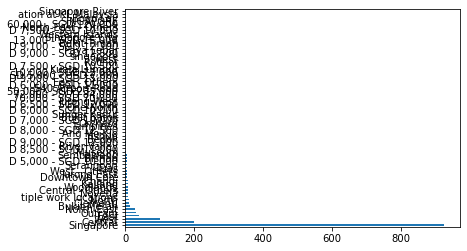

In [70]:
df['Location'].value_counts().plot(kind='barh')

some locations have the pay range instead 

In [71]:
pay_regex = re.compile(r'D? ?\d{1,3},\d{3} - SGD ?\d{1,3},\d{3}\s{0,10}?')

I realise that the regex couldnt work because there is a \xa character inside. So i called the function cleanup_jobdescription that was meant for the job description to clean up locations

In [72]:
df.Location[1394]

'D\xa09,000 - SGD\xa015,000'

In [73]:
df.Location = df.Location.apply(cleanup_jobdescription)

In [74]:
df.Location[1394]

'D9,000 - SGD15,000'

In [75]:
df['Pay2'] = df['Location'].apply(lambda x : str((pay_regex.findall(x))))

In [76]:
#checking the rows where the pay is captured in location. It appears that some already have pay included. 
df[df.Pay2 != '[]']

,Job Title,Companies,Location,Date posted,Other information,Job Description,Pay_average,Qualifications,Position,Employment Type,Years of Experience,Pay2
13,"Senior Data Scientist / Assistant Manager, Dat...",VGroup Holdings Pte Ltd,"D5,000 - SGD10,000",NaT,"Senior Executive Bachelor's Degree, Post Gradu...",Candidates will be responsible for numerous tr...,6500.0,"Bachelor's Degree , Diploma , Post Graduate Di...",Senior Executive,Full-Time,5,"['D5,000 - SGD10,000']"
43,Data Scientist (Image Processing/ Computer Vis...,Lam Research Singapore Pte Ltd,"D6,500 - SGD12,000",NaT,Leading supplier of wafer fabrication equipme...,Position Summary:This position will be working...,NaN,Master's Degree,Senior Executive,Full-Time,3,"['D6,500 - SGD12,000']"
76,Data Scientist,Talent Trader Group Pte Ltd - IT,"D5,000 - SGD10,000",2021-09-10,Junior Executive Professional Certificate/NiTE...,Responsibilities:Work with business stakeholde...,7500.0,"Professional Certificate , Bachelor's Degree ,...",Junior Executive,Full-Time,Not indicated,"['D5,000 - SGD10,000']"
107,Data Science Specialist | 5DAYS | 1 Year Contr...,Achieve Career Consultant Pte Ltd,"D8,000 - SGD12,500",2021-09-11,"Senior Executive Bachelor's Degree, Post Gradu...", Annual Remuneration up till $150K 1-Year Co...,NaN,"Bachelor's Degree , Diploma , Post Graduate Di...",Senior Executive,Full-Time,6,"['D8,000 - SGD12,500']"
247,Data Engineer - Permanent,VOLT,"D6,000 - SGD10,000",2021-09-09,"Non-Executive Bachelor's Degree, Post Graduate...",Data EngineerA leading organization who is est...,6750.0,"Bachelor's Degree , Diploma , Post Graduate Di...",Non-Executive,Full-Time,3,"['D6,000 - SGD10,000']"
252,Senior Data Engineer (Permanent Role),Helius Technologies Pte Ltd,"D8,500 - SGD11,000",2021-09-10,"Senior Executive Diploma, Advanced/Higher/Grad...","Senior Data Engineer (Permanent Role, Central ...",NaN,"Bachelor's Degree , Diploma , Advanced/Higher/...",Senior Executive,Full-Time,8,"['D8,500 - SGD11,000']"
292,Data Scientist,ARYAN SOLUTIONS PTE. LTD.,"10,000 - SGD12,000",2021-09-04,Senior Executive Primary/Secondary School/O Le...,We are looking for a Data Scientist with an In...,NaN,"Professional Certificate , NiTEC , Primary/Se...",Senior Executive,Full-Time,3,"['10,000 - SGD12,000']"
309,Data Science Specialist - [One Year Contract| ...,Achieve Career Consultant Pte Ltd,"D9,000 - SGD12,000",2021-09-06,"Senior Manager Bachelor's Degree, Post Graduat...", High Salary + Allowance + Bonuses!! Profici...,NaN,"Bachelor's Degree , Diploma , Post Graduate Di...",Senior Manger,Full-Time,4,"['D9,000 - SGD12,000']"
312,Formulation Scientist - Drugs / Cosmetics / Me...,VOLT,"70,000 - SGD70,000",2021-09-06,"Non-Executive Bachelor's Degree, Post Graduate...",Formulation Scientist - Drugs / Cosmetics / Me...,NaN,"Bachelor's Degree , Diploma , Post Graduate Di...",Non-Executive,Full-Time,3,"['70,000 - SGD70,000']"
328,Data Architect,Shell Infotech Pte Ltd,"D9,000 - SGD12,000",2021-09-07,"Senior Executive Diploma, Advanced/Higher/Grad...",Data ArchitectJob Responsibilities:Define &amp...,NaN,"Bachelor's Degree , Diploma , Advanced/Higher/...",Senior Executive,Full-Time,7,"['D9,000 - SGD12,000']"


In [77]:
df.iloc[247]

Job Title                                      Data Engineer - Permanent
Companies                                                           VOLT
Location                                              D6,000 - SGD10,000
Date posted                                          2021-09-09 00:00:00
Other information      Non-Executive Bachelor's Degree, Post Graduate...
Job Description        Data EngineerA leading organization who is est...
Pay_average                                                         6750
Qualifications         Bachelor's Degree , Diploma , Post Graduate Di...
Position                                                   Non-Executive
Employment Type                                                Full-Time
Years of Experience                                                    3
Pay2                                              ['D6,000 - SGD10,000']
Name: 247, dtype: object

At this point I'm rather puzzled why there are two pay included and concluded that pay is both in pay and in location.
Plus there is also a possibility in the pay being available or stated in the Job Description section.
I think the best approach is impute the pay gathered from location field into the pay columns and then rename the invalid locations to be 'Singapore' instead

TODO: Put pay2 into pay lower bound and upper bound

In [78]:
df['Pay2'] = df['Pay2'].apply(lambda x : x.replace("SGD",''))

In [79]:
df['Pay2'] = df['Pay2'].apply(lambda x : x.replace("D",''))

In [80]:
df['Pay2'] = df['Pay2'].apply(lambda x : x.replace(",",''))

In [81]:
df['Pay2'] = df['Pay2'].apply(lambda x : x.replace("'",''))

In [82]:
df['Pay2'] = df['Pay2'].apply(lambda x : x.replace("[",''))

In [83]:
df['Pay2'] = df['Pay2'].apply(lambda x : x.replace("]",''))

In [84]:
df[df['Pay2'] != '']['Pay2'].count()

25

In [85]:
df[df['Pay2'] != '']

,Job Title,Companies,Location,Date posted,Other information,Job Description,Pay_average,Qualifications,Position,Employment Type,Years of Experience,Pay2
13,"Senior Data Scientist / Assistant Manager, Dat...",VGroup Holdings Pte Ltd,"D5,000 - SGD10,000",NaT,"Senior Executive Bachelor's Degree, Post Gradu...",Candidates will be responsible for numerous tr...,6500.0,"Bachelor's Degree , Diploma , Post Graduate Di...",Senior Executive,Full-Time,5,5000 - 10000
43,Data Scientist (Image Processing/ Computer Vis...,Lam Research Singapore Pte Ltd,"D6,500 - SGD12,000",NaT,Leading supplier of wafer fabrication equipme...,Position Summary:This position will be working...,NaN,Master's Degree,Senior Executive,Full-Time,3,6500 - 12000
76,Data Scientist,Talent Trader Group Pte Ltd - IT,"D5,000 - SGD10,000",2021-09-10,Junior Executive Professional Certificate/NiTE...,Responsibilities:Work with business stakeholde...,7500.0,"Professional Certificate , Bachelor's Degree ,...",Junior Executive,Full-Time,Not indicated,5000 - 10000
107,Data Science Specialist | 5DAYS | 1 Year Contr...,Achieve Career Consultant Pte Ltd,"D8,000 - SGD12,500",2021-09-11,"Senior Executive Bachelor's Degree, Post Gradu...", Annual Remuneration up till $150K 1-Year Co...,NaN,"Bachelor's Degree , Diploma , Post Graduate Di...",Senior Executive,Full-Time,6,8000 - 12500
247,Data Engineer - Permanent,VOLT,"D6,000 - SGD10,000",2021-09-09,"Non-Executive Bachelor's Degree, Post Graduate...",Data EngineerA leading organization who is est...,6750.0,"Bachelor's Degree , Diploma , Post Graduate Di...",Non-Executive,Full-Time,3,6000 - 10000
252,Senior Data Engineer (Permanent Role),Helius Technologies Pte Ltd,"D8,500 - SGD11,000",2021-09-10,"Senior Executive Diploma, Advanced/Higher/Grad...","Senior Data Engineer (Permanent Role, Central ...",NaN,"Bachelor's Degree , Diploma , Advanced/Higher/...",Senior Executive,Full-Time,8,8500 - 11000
292,Data Scientist,ARYAN SOLUTIONS PTE. LTD.,"10,000 - SGD12,000",2021-09-04,Senior Executive Primary/Secondary School/O Le...,We are looking for a Data Scientist with an In...,NaN,"Professional Certificate , NiTEC , Primary/Se...",Senior Executive,Full-Time,3,10000 - 12000
309,Data Science Specialist - [One Year Contract| ...,Achieve Career Consultant Pte Ltd,"D9,000 - SGD12,000",2021-09-06,"Senior Manager Bachelor's Degree, Post Graduat...", High Salary + Allowance + Bonuses!! Profici...,NaN,"Bachelor's Degree , Diploma , Post Graduate Di...",Senior Manger,Full-Time,4,9000 - 12000
312,Formulation Scientist - Drugs / Cosmetics / Me...,VOLT,"70,000 - SGD70,000",2021-09-06,"Non-Executive Bachelor's Degree, Post Graduate...",Formulation Scientist - Drugs / Cosmetics / Me...,NaN,"Bachelor's Degree , Diploma , Post Graduate Di...",Non-Executive,Full-Time,3,70000 - 70000
328,Data Architect,Shell Infotech Pte Ltd,"D9,000 - SGD12,000",2021-09-07,"Senior Executive Diploma, Advanced/Higher/Grad...",Data ArchitectJob Responsibilities:Define &amp...,NaN,"Bachelor's Degree , Diploma , Advanced/Higher/...",Senior Executive,Full-Time,7,9000 - 12000


In [86]:
df[df['Pay2'] != '']

,Job Title,Companies,Location,Date posted,Other information,Job Description,Pay_average,Qualifications,Position,Employment Type,Years of Experience,Pay2
13,"Senior Data Scientist / Assistant Manager, Dat...",VGroup Holdings Pte Ltd,"D5,000 - SGD10,000",NaT,"Senior Executive Bachelor's Degree, Post Gradu...",Candidates will be responsible for numerous tr...,6500.0,"Bachelor's Degree , Diploma , Post Graduate Di...",Senior Executive,Full-Time,5,5000 - 10000
43,Data Scientist (Image Processing/ Computer Vis...,Lam Research Singapore Pte Ltd,"D6,500 - SGD12,000",NaT,Leading supplier of wafer fabrication equipme...,Position Summary:This position will be working...,NaN,Master's Degree,Senior Executive,Full-Time,3,6500 - 12000
76,Data Scientist,Talent Trader Group Pte Ltd - IT,"D5,000 - SGD10,000",2021-09-10,Junior Executive Professional Certificate/NiTE...,Responsibilities:Work with business stakeholde...,7500.0,"Professional Certificate , Bachelor's Degree ,...",Junior Executive,Full-Time,Not indicated,5000 - 10000
107,Data Science Specialist | 5DAYS | 1 Year Contr...,Achieve Career Consultant Pte Ltd,"D8,000 - SGD12,500",2021-09-11,"Senior Executive Bachelor's Degree, Post Gradu...", Annual Remuneration up till $150K 1-Year Co...,NaN,"Bachelor's Degree , Diploma , Post Graduate Di...",Senior Executive,Full-Time,6,8000 - 12500
247,Data Engineer - Permanent,VOLT,"D6,000 - SGD10,000",2021-09-09,"Non-Executive Bachelor's Degree, Post Graduate...",Data EngineerA leading organization who is est...,6750.0,"Bachelor's Degree , Diploma , Post Graduate Di...",Non-Executive,Full-Time,3,6000 - 10000
252,Senior Data Engineer (Permanent Role),Helius Technologies Pte Ltd,"D8,500 - SGD11,000",2021-09-10,"Senior Executive Diploma, Advanced/Higher/Grad...","Senior Data Engineer (Permanent Role, Central ...",NaN,"Bachelor's Degree , Diploma , Advanced/Higher/...",Senior Executive,Full-Time,8,8500 - 11000
292,Data Scientist,ARYAN SOLUTIONS PTE. LTD.,"10,000 - SGD12,000",2021-09-04,Senior Executive Primary/Secondary School/O Le...,We are looking for a Data Scientist with an In...,NaN,"Professional Certificate , NiTEC , Primary/Se...",Senior Executive,Full-Time,3,10000 - 12000
309,Data Science Specialist - [One Year Contract| ...,Achieve Career Consultant Pte Ltd,"D9,000 - SGD12,000",2021-09-06,"Senior Manager Bachelor's Degree, Post Graduat...", High Salary + Allowance + Bonuses!! Profici...,NaN,"Bachelor's Degree , Diploma , Post Graduate Di...",Senior Manger,Full-Time,4,9000 - 12000
312,Formulation Scientist - Drugs / Cosmetics / Me...,VOLT,"70,000 - SGD70,000",2021-09-06,"Non-Executive Bachelor's Degree, Post Graduate...",Formulation Scientist - Drugs / Cosmetics / Me...,NaN,"Bachelor's Degree , Diploma , Post Graduate Di...",Non-Executive,Full-Time,3,70000 - 70000
328,Data Architect,Shell Infotech Pte Ltd,"D9,000 - SGD12,000",2021-09-07,"Senior Executive Diploma, Advanced/Higher/Grad...",Data ArchitectJob Responsibilities:Define &amp...,NaN,"Bachelor's Degree , Diploma , Advanced/Higher/...",Senior Executive,Full-Time,7,9000 - 12000


In [87]:
df[df['Pay2']!='']

,Job Title,Companies,Location,Date posted,Other information,Job Description,Pay_average,Qualifications,Position,Employment Type,Years of Experience,Pay2
13,"Senior Data Scientist / Assistant Manager, Dat...",VGroup Holdings Pte Ltd,"D5,000 - SGD10,000",NaT,"Senior Executive Bachelor's Degree, Post Gradu...",Candidates will be responsible for numerous tr...,6500.0,"Bachelor's Degree , Diploma , Post Graduate Di...",Senior Executive,Full-Time,5,5000 - 10000
43,Data Scientist (Image Processing/ Computer Vis...,Lam Research Singapore Pte Ltd,"D6,500 - SGD12,000",NaT,Leading supplier of wafer fabrication equipme...,Position Summary:This position will be working...,NaN,Master's Degree,Senior Executive,Full-Time,3,6500 - 12000
76,Data Scientist,Talent Trader Group Pte Ltd - IT,"D5,000 - SGD10,000",2021-09-10,Junior Executive Professional Certificate/NiTE...,Responsibilities:Work with business stakeholde...,7500.0,"Professional Certificate , Bachelor's Degree ,...",Junior Executive,Full-Time,Not indicated,5000 - 10000
107,Data Science Specialist | 5DAYS | 1 Year Contr...,Achieve Career Consultant Pte Ltd,"D8,000 - SGD12,500",2021-09-11,"Senior Executive Bachelor's Degree, Post Gradu...", Annual Remuneration up till $150K 1-Year Co...,NaN,"Bachelor's Degree , Diploma , Post Graduate Di...",Senior Executive,Full-Time,6,8000 - 12500
247,Data Engineer - Permanent,VOLT,"D6,000 - SGD10,000",2021-09-09,"Non-Executive Bachelor's Degree, Post Graduate...",Data EngineerA leading organization who is est...,6750.0,"Bachelor's Degree , Diploma , Post Graduate Di...",Non-Executive,Full-Time,3,6000 - 10000
252,Senior Data Engineer (Permanent Role),Helius Technologies Pte Ltd,"D8,500 - SGD11,000",2021-09-10,"Senior Executive Diploma, Advanced/Higher/Grad...","Senior Data Engineer (Permanent Role, Central ...",NaN,"Bachelor's Degree , Diploma , Advanced/Higher/...",Senior Executive,Full-Time,8,8500 - 11000
292,Data Scientist,ARYAN SOLUTIONS PTE. LTD.,"10,000 - SGD12,000",2021-09-04,Senior Executive Primary/Secondary School/O Le...,We are looking for a Data Scientist with an In...,NaN,"Professional Certificate , NiTEC , Primary/Se...",Senior Executive,Full-Time,3,10000 - 12000
309,Data Science Specialist - [One Year Contract| ...,Achieve Career Consultant Pte Ltd,"D9,000 - SGD12,000",2021-09-06,"Senior Manager Bachelor's Degree, Post Graduat...", High Salary + Allowance + Bonuses!! Profici...,NaN,"Bachelor's Degree , Diploma , Post Graduate Di...",Senior Manger,Full-Time,4,9000 - 12000
312,Formulation Scientist - Drugs / Cosmetics / Me...,VOLT,"70,000 - SGD70,000",2021-09-06,"Non-Executive Bachelor's Degree, Post Graduate...",Formulation Scientist - Drugs / Cosmetics / Me...,NaN,"Bachelor's Degree , Diploma , Post Graduate Di...",Non-Executive,Full-Time,3,70000 - 70000
328,Data Architect,Shell Infotech Pte Ltd,"D9,000 - SGD12,000",2021-09-07,"Senior Executive Diploma, Advanced/Higher/Grad...",Data ArchitectJob Responsibilities:Define &amp...,NaN,"Bachelor's Degree , Diploma , Advanced/Higher/...",Senior Executive,Full-Time,7,9000 - 12000


In [88]:
df['Pay2'] = df['Pay2'].apply(lambda x: ((int(x[:int(len(x)/2)-2]) + int(x[int(len(x)/2)+1:]) )/2) if x !='' else x)

In [89]:
df[df['Pay2'] != '']

,Job Title,Companies,Location,Date posted,Other information,Job Description,Pay_average,Qualifications,Position,Employment Type,Years of Experience,Pay2
13,"Senior Data Scientist / Assistant Manager, Dat...",VGroup Holdings Pte Ltd,"D5,000 - SGD10,000",NaT,"Senior Executive Bachelor's Degree, Post Gradu...",Candidates will be responsible for numerous tr...,6500.0,"Bachelor's Degree , Diploma , Post Graduate Di...",Senior Executive,Full-Time,5,7500
43,Data Scientist (Image Processing/ Computer Vis...,Lam Research Singapore Pte Ltd,"D6,500 - SGD12,000",NaT,Leading supplier of wafer fabrication equipme...,Position Summary:This position will be working...,NaN,Master's Degree,Senior Executive,Full-Time,3,9250
76,Data Scientist,Talent Trader Group Pte Ltd - IT,"D5,000 - SGD10,000",2021-09-10,Junior Executive Professional Certificate/NiTE...,Responsibilities:Work with business stakeholde...,7500.0,"Professional Certificate , Bachelor's Degree ,...",Junior Executive,Full-Time,Not indicated,7500
107,Data Science Specialist | 5DAYS | 1 Year Contr...,Achieve Career Consultant Pte Ltd,"D8,000 - SGD12,500",2021-09-11,"Senior Executive Bachelor's Degree, Post Gradu...", Annual Remuneration up till $150K 1-Year Co...,NaN,"Bachelor's Degree , Diploma , Post Graduate Di...",Senior Executive,Full-Time,6,10250
247,Data Engineer - Permanent,VOLT,"D6,000 - SGD10,000",2021-09-09,"Non-Executive Bachelor's Degree, Post Graduate...",Data EngineerA leading organization who is est...,6750.0,"Bachelor's Degree , Diploma , Post Graduate Di...",Non-Executive,Full-Time,3,8000
252,Senior Data Engineer (Permanent Role),Helius Technologies Pte Ltd,"D8,500 - SGD11,000",2021-09-10,"Senior Executive Diploma, Advanced/Higher/Grad...","Senior Data Engineer (Permanent Role, Central ...",NaN,"Bachelor's Degree , Diploma , Advanced/Higher/...",Senior Executive,Full-Time,8,9750
292,Data Scientist,ARYAN SOLUTIONS PTE. LTD.,"10,000 - SGD12,000",2021-09-04,Senior Executive Primary/Secondary School/O Le...,We are looking for a Data Scientist with an In...,NaN,"Professional Certificate , NiTEC , Primary/Se...",Senior Executive,Full-Time,3,6500
309,Data Science Specialist - [One Year Contract| ...,Achieve Career Consultant Pte Ltd,"D9,000 - SGD12,000",2021-09-06,"Senior Manager Bachelor's Degree, Post Graduat...", High Salary + Allowance + Bonuses!! Profici...,NaN,"Bachelor's Degree , Diploma , Post Graduate Di...",Senior Manger,Full-Time,4,10500
312,Formulation Scientist - Drugs / Cosmetics / Me...,VOLT,"70,000 - SGD70,000",2021-09-06,"Non-Executive Bachelor's Degree, Post Graduate...",Formulation Scientist - Drugs / Cosmetics / Me...,NaN,"Bachelor's Degree , Diploma , Post Graduate Di...",Non-Executive,Full-Time,3,38500
328,Data Architect,Shell Infotech Pte Ltd,"D9,000 - SGD12,000",2021-09-07,"Senior Executive Diploma, Advanced/Higher/Grad...",Data ArchitectJob Responsibilities:Define &amp...,NaN,"Bachelor's Degree , Diploma , Advanced/Higher/...",Senior Executive,Full-Time,7,10500


In [90]:
df.loc[df['Pay2'] != " ", 'Location'] = 'Singapore'

In [91]:
df[df['Pay2'] != '']

,Job Title,Companies,Location,Date posted,Other information,Job Description,Pay_average,Qualifications,Position,Employment Type,Years of Experience,Pay2
13,"Senior Data Scientist / Assistant Manager, Dat...",VGroup Holdings Pte Ltd,Singapore,NaT,"Senior Executive Bachelor's Degree, Post Gradu...",Candidates will be responsible for numerous tr...,6500.0,"Bachelor's Degree , Diploma , Post Graduate Di...",Senior Executive,Full-Time,5,7500
43,Data Scientist (Image Processing/ Computer Vis...,Lam Research Singapore Pte Ltd,Singapore,NaT,Leading supplier of wafer fabrication equipme...,Position Summary:This position will be working...,NaN,Master's Degree,Senior Executive,Full-Time,3,9250
76,Data Scientist,Talent Trader Group Pte Ltd - IT,Singapore,2021-09-10,Junior Executive Professional Certificate/NiTE...,Responsibilities:Work with business stakeholde...,7500.0,"Professional Certificate , Bachelor's Degree ,...",Junior Executive,Full-Time,Not indicated,7500
107,Data Science Specialist | 5DAYS | 1 Year Contr...,Achieve Career Consultant Pte Ltd,Singapore,2021-09-11,"Senior Executive Bachelor's Degree, Post Gradu...", Annual Remuneration up till $150K 1-Year Co...,NaN,"Bachelor's Degree , Diploma , Post Graduate Di...",Senior Executive,Full-Time,6,10250
247,Data Engineer - Permanent,VOLT,Singapore,2021-09-09,"Non-Executive Bachelor's Degree, Post Graduate...",Data EngineerA leading organization who is est...,6750.0,"Bachelor's Degree , Diploma , Post Graduate Di...",Non-Executive,Full-Time,3,8000
252,Senior Data Engineer (Permanent Role),Helius Technologies Pte Ltd,Singapore,2021-09-10,"Senior Executive Diploma, Advanced/Higher/Grad...","Senior Data Engineer (Permanent Role, Central ...",NaN,"Bachelor's Degree , Diploma , Advanced/Higher/...",Senior Executive,Full-Time,8,9750
292,Data Scientist,ARYAN SOLUTIONS PTE. LTD.,Singapore,2021-09-04,Senior Executive Primary/Secondary School/O Le...,We are looking for a Data Scientist with an In...,NaN,"Professional Certificate , NiTEC , Primary/Se...",Senior Executive,Full-Time,3,6500
309,Data Science Specialist - [One Year Contract| ...,Achieve Career Consultant Pte Ltd,Singapore,2021-09-06,"Senior Manager Bachelor's Degree, Post Graduat...", High Salary + Allowance + Bonuses!! Profici...,NaN,"Bachelor's Degree , Diploma , Post Graduate Di...",Senior Manger,Full-Time,4,10500
312,Formulation Scientist - Drugs / Cosmetics / Me...,VOLT,Singapore,2021-09-06,"Non-Executive Bachelor's Degree, Post Graduate...",Formulation Scientist - Drugs / Cosmetics / Me...,NaN,"Bachelor's Degree , Diploma , Post Graduate Di...",Non-Executive,Full-Time,3,38500
328,Data Architect,Shell Infotech Pte Ltd,Singapore,2021-09-07,"Senior Executive Diploma, Advanced/Higher/Grad...",Data ArchitectJob Responsibilities:Define &amp...,NaN,"Bachelor's Degree , Diploma , Advanced/Higher/...",Senior Executive,Full-Time,7,10500


In [92]:
df.loc[df['Pay2'] == "9250", 'Pay_average'] = "9250"

In [93]:
df.loc[df['Pay2'] == "9750", 'Pay_average'] = "9750"

In [94]:
df.loc[df['Pay2'] == "10500", 'Pay_average'] = "10500"

In [95]:
df.loc[df['Pay2'] == "10900", 'Pay_average'] = "10900"

In [96]:
df.loc[df['Pay2'] == "90000", 'Pay_average'] = "90000"

In [97]:
df.loc[df['Pay2'] == "12000", 'Pay_average'] = "12000"

In [98]:
df.loc[df['Pay2'] == "10750", 'Pay_average'] = "10750"

In [99]:
#Deleting the new column Pay2
df.drop(columns= 'Pay2', inplace = True)

In [100]:
def replacing_values(col_to_replace, col_new):
    new_col =[]
    for i in range(0, len(col_to_replace)):
        if col_new[i] != '' and col_to_replace[i] == 'nan':
            print(col_new[i])
            first_value_length = int(len(col_new[i])/2)-2
            print(first_value_length)
            first_value = col_new[i][:first_value_length]
            print(first_value)
            second_value_length = int(len(col_new[i])/2)+1
            print(second_value_length)                   
            second_value = col_new[i][second_value_length:]
            print(second_value)            
            mean_value = (int(first_value) + int(second_value) )/2
            print(mean_value)
            #col_to_replace[i] = mean_value
            new_col.append(mean_value)
        else: new_col.append(col_to_replace[i]) #continue
    return new_col

In [101]:
df.iloc[247]['Other information']

"Non-Executive Bachelor's Degree, Post Graduate Diploma, Professional Degree 3 years Full-Time Computer/Information Technology, IT-Software 200408881M 12C5526 More than 5000 Employees Human Resources Management / Consulting"

## Skills needed in the Job

In [102]:
skills_list =('Machine learning', 'Python', 'deep learning', 'artificial intelligence', 'keras', 'Pytorch' , 'sci-kit learn', 'sklearn', 
             'SQL', 'cloud','AWS','Azure', 'GCP', 'Hadoop', 'Spark', 'Hive', 'HBase', 'Kafka' , 'computer vision', 
             'Pandas', 'Git' , 'opencv', 'Scala', 'NLP')

In [103]:
df.sample(3)

,Job Title,Companies,Location,Date posted,Other information,Job Description,Pay_average,Qualifications,Position,Employment Type,Years of Experience
19,Research Scientist (Assay Development),Nitto Denko Asia Technical Centre Pte Ltd,Singapore,2021-09-12,Competitive remuneration package Work Life B...,Job Description:• Design and execute lab exper...,NaN,Doctorate (PhD),Senior Executive,Full-Time,2
1210,"Scientist (MEMS/pMUT), IME","Agency for Science, Technology and Research (A...",Singapore,2021-08-31,Senior Executive Doctorate (PhD) 5 years Full-...,"The Sensors, Actuators, &amp; Microsystems (SA...",4200,Doctorate (PhD),Senior Executive,Full-Time,5
299,IT Solutions Architect (Data) - (21000022),The Great Eastern Life Assurance Co Ltd,Singapore,2021-09-09,"Senior Manager Bachelor's Degree, Post Graduat...",Job PurposeThe solution architect (data) role ...,8250,"Bachelor's Degree , Diploma , Post Graduate Di...",Senior Manger,Full-Time,10


In [104]:
df['Skills Needed'] = df['Job Description'].apply(lambda x : returnhits(skills_list, x))

In [105]:
df.sample(3)

,Job Title,Companies,Location,Date posted,Other information,Job Description,Pay_average,Qualifications,Position,Employment Type,Years of Experience,Skills Needed
624,Data Engineer (6-months temp),CapitaLand Group,Singapore,2021-09-02,Junior Executive Bachelor's Degree Full-Time O...,CapitaLand Limited (CapitaLand) is one of Asia...,NaN,Bachelor's Degree,Junior Executive,Full-Time,Not indicated,"Python , SQL , Azure , Spark , Hive , Scala"
1333,"SVP, Solutions Architect, Group Consumer Banki...",DBS Bank Limited,Singapore,2021-09-01,"Senior Manager Diploma, Advanced/Higher/Gradua...","SVP, Solutions Architect, Group Consumer Banki...",NaN,"Bachelor's Degree , Diploma , Advanced/Higher/...",Senior Manger,Full-Time,7,"Machine learning , Python , cloud , Hadoop , S..."
850,"Contract Associate Scientist, Imaging (Matlab/...",Manpower Staffing Services (S) Pte Ltd - SCS,Singapore,2021-09-02,"Junior Executive Bachelor's Degree, Post Gradu...",Our Client is a Giant pharmaceutical company h...,NaN,"Bachelor's Degree , Diploma , Post Graduate Di...",Junior Executive,Full-Time,Not indicated,"Python , cloud , AWS"


In [106]:
df.iloc[1168]['Job Description']

'WeBank-NTU Joint Research Centre on FinTech invites applications for the position of Research Fellow.Key Responsibilities:Take charge of research &amp; developments on projects in mobile banking user experienceStatistical analysis and modelling for survey data and behavioural experiments/recordingsReports, conference papers and manuscripts preparationsCommunicating with the research team and liaising with the collaborators of the projectParticipating in meetings and preparation of materials in Mandarin and EnglishJob Requirements:PhD degree in Psychology, Behavioural Sciences, Statistics or equivalent fieldsPrior research experience on survey studies, and conducting behavioural experimentsAbilities in statistical analysis and modelling and programming, good at Matlab coding, R, SPSS, or PythonGood English and Mandarin writing and communication skills (in order toparticipate in meetings and preparation of materials in Mandarin and English language.)We regret that only shortlisted candi

In [107]:
df.head()

,Job Title,Companies,Location,Date posted,Other information,Job Description,Pay_average,Qualifications,Position,Employment Type,Years of Experience,Skills Needed
0,Sales Operations and Installed Base Data Analyst,Howden,Singapore,2021-09-11,"Dynamic, innovative, global company - APPLY N...",The Big Picture:Howden Singapore has an immedi...,NaN,"Bachelor's Degree , Diploma , Post Graduate Di...",Junior Executive,Full-Time,3,
1,Data Analyst - Financial Markets,AMUNDI SINGAPORE LIMITED,Singapore,2021-09-06,"Entry Level Bachelor's Degree, Post Graduate D...",Job descriptionYou will be part of the Data Sc...,4000,"Bachelor's Degree , Diploma , Post Graduate Di...",Entry Level,Contract,Not indicated,"Python , Pandas"
2,Food Scientist,Organic Technology SE-ASIA Pte Ltd,Singapore,2021-09-06,"International environment, awesome colleagues...",Part time role(3 days per week) and will suppo...,4000,"Bachelor's Degree , Diploma , Post Graduate Di...",Entry Level,Part-Time,2,
3,Data Scientist,Singapore Pools (Private) Limited,Singapore,NaT,Excellent Benefits Learning Organisation Gi...,We are looking for a passionate and profession...,NaN,"Bachelor's Degree , Diploma , Post Graduate Di...",Junior Executive,Full-Time,2,"Python , SQL"
4,Scientist I/II,"Agency for Science, Technology and Research (A...",Singapore,NaT,"Junior Executive Bachelor's Degree, Post Gradu...",﻿The officer will be required to but not exclu...,NaN,"Bachelor's Degree , Diploma , Post Graduate Di...",Junior Executive,Full-Time,3,


<AxesSubplot:>

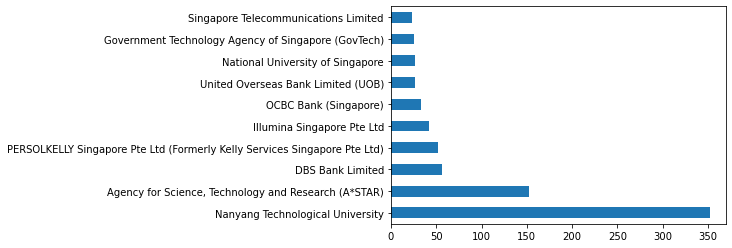

In [108]:
df['Companies'].value_counts().nlargest(10).plot(kind= 'barh')

I'm surprised to see NTU as the main employer of data scientist. But it is possible that the search term of data scientist does not capture data scientist.<br>
I will delete rows that does not have the skills python in the Job Description

In [109]:
df[df['Skills Needed'] == '']['Job Description']

0       The Big Picture:Howden Singapore has an immedi...
2       Part time role(3 days per week) and will suppo...
4       ﻿The officer will be required to but not exclu...
7       Specific RolesA)Bioassay:Develop cell-based an...
10      Job SummaryAs a Scientist/Senior Scientist, yo...
                              ...                        
1492    A great opportunity to work with a leading tec...
1493    OverviewThe Lab Information System (LIS) Offic...
1494    A Research Associate position is available in ...
1495    The successful incumbent will be responsible f...
1497    You will be responsible for manpower reporting...
Name: Job Description, Length: 694, dtype: object

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Job Title            1500 non-null   object        
 1   Companies            1500 non-null   object        
 2   Location             1500 non-null   object        
 3   Date posted          1197 non-null   datetime64[ns]
 4   Other information    1500 non-null   object        
 5   Job Description      1500 non-null   object        
 6   Pay_average          320 non-null    object        
 7   Qualifications       1500 non-null   object        
 8   Position             1500 non-null   object        
 9   Employment Type      1500 non-null   object        
 10  Years of Experience  1500 non-null   object        
 11  Skills Needed        1500 non-null   object        
dtypes: datetime64[ns](1), object(11)
memory usage: 140.8+ KB


In [111]:
df = df[df['Skills Needed'] != '']

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 806 entries, 1 to 1499
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Job Title            806 non-null    object        
 1   Companies            806 non-null    object        
 2   Location             806 non-null    object        
 3   Date posted          661 non-null    datetime64[ns]
 4   Other information    806 non-null    object        
 5   Job Description      806 non-null    object        
 6   Pay_average          163 non-null    object        
 7   Qualifications       806 non-null    object        
 8   Position             806 non-null    object        
 9   Employment Type      806 non-null    object        
 10  Years of Experience  806 non-null    object        
 11  Skills Needed        806 non-null    object        
dtypes: datetime64[ns](1), object(11)
memory usage: 81.9+ KB


In [113]:
df.reset_index(inplace = True , drop = True)

In [114]:
df.sample(5)

,Job Title,Companies,Location,Date posted,Other information,Job Description,Pay_average,Qualifications,Position,Employment Type,Years of Experience,Skills Needed
447,"Data Quality & Collection Analyst, Travel Data...",BCD Travel Asia Pacific Pte Ltd,Singapore,2021-09-10,Dynamic Work Environment Competitive Package...,Are you ready for a challenging and exciting e...,NaN,"Diploma , Advanced/Higher/Graduate Diploma",Junior Executive,Full-Time,3,SQL
678,Research Associate (R00002012),Nanyang Technological University,Singapore,2021-09-10,Junior Executive Master's Degree 1 year Full-T...,Research Associate (Computer Engineering/Compu...,NaN,Master's Degree,Junior Executive,Full-Time,Not indicated,computer vision
674,Cyber Security Scientist / Engineer,ST Engineering Ltd,Singapore,2021-09-09,"Junior Executive Bachelor's Degree, Post Gradu...",Job Description:Conduct research &amp; develop...,NaN,"Bachelor's Degree , Diploma , Post Graduate Di...",Junior Executive,Full-Time,2,deep learning
174,Software Engineer(Machine Learning& Artificial...,Appzgate Solutions Pte Ltd,Singapore,2021-09-12,Junior Executive Not Specified 2 years Full-Ti...,Benefits0-20% performance related pay (PRP) pe...,NaN,Not indicated,Junior Executive,Full-Time,2,"Python , deep learning , artificial intelligence"
76,"Sr Staff Bioinformatics Scientist, Emerging So...",Illumina Singapore Pte Ltd,Singapore,NaT,"Junior Executive Bachelor's Degree, Post Gradu...",Position SummaryThe cost to sequence a human g...,NaN,"Bachelor's Degree , Diploma , Post Graduate Di...",Junior Executive,Contract,Not indicated,"Python , artificial intelligence , SQL"


In [115]:
df.iloc[162]['Job Description']

"Executive - Data &amp; InsightsLooking for a new member to join the Data Engineering Team of one of Asia's largest real estate companies. This role is a 6 month contract, and the salary range is $3500-4150. Only available to Singaporeans at this time.ResponsibilitiesBuild a robust and scalable Enterprise Data Platform for batch/real-time data processing and machine learning modelDevelop data processing pipelines for ingestion, modelling, analysis, mining and reporting with SQL, Spark, Python, etc.Solve technical challenges posted to the Enterprise Data Platform in huge volume, velocity, and business complexityCollaborate with CapitaLand's infrastructure, Business Analysts, and the Data Science team for data engineering support and development/deployment of machine learning modelsSupport data management projects when needed and perform additional data-related tasksRequirementsDegree in Computer Science, Engineering, or other relevant technical disciplines1-3 years of experience in data

Some positions do not really cater for the jobs that I am looking for, so I will eliminate positions that do not have these keywords in the skills list

In [116]:
df['Skills Needed'].str.split(',')

0                                     [Python ,  Pandas]
1                                        [Python ,  SQL]
2      [Python ,  Hadoop ,  Kafka ,  computer vision ...
3      [Python ,  SQL ,  Azure ,  Spark ,  Hive ,  Sc...
4      [Python ,  SQL ,  Hadoop ,  Spark ,  Scala ,  ...
                             ...                        
801                   [deep learning ,  computer vision]
802                                                [AWS]
803                                    [computer vision]
804                                                [SQL]
805                                      [Python ,  SQL]
Name: Skills Needed, Length: 806, dtype: object

In [117]:
df['Number of Skills'] = df['Skills Needed'].apply(lambda x : len(x.split(',')))

<ipython-input-117-65e2906f16fe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Number of Skills'] = df['Skills Needed'].apply(lambda x : len(x.split(',')))


In [118]:
df['Number of Skills'] = df['Number of Skills'].astype(int)

<ipython-input-118-332ab47bfb05>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Number of Skills'] = df['Number of Skills'].astype(int)


In [119]:
df['Pay_average'] = pd.to_numeric(df['Pay_average'], errors = 'coerce')

<ipython-input-119-9fff0567dff8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Pay_average'] = pd.to_numeric(df['Pay_average'], errors = 'coerce')


In [120]:
df['Years of Experience'] = pd.to_numeric(df['Years of Experience'], errors = 'coerce')

<ipython-input-120-357d8db53d05>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Years of Experience'] = pd.to_numeric(df['Years of Experience'], errors = 'coerce')


In [121]:
df.head()

,Job Title,Companies,Location,Date posted,Other information,Job Description,Pay_average,Qualifications,Position,Employment Type,Years of Experience,Skills Needed,Number of Skills
0,Data Analyst - Financial Markets,AMUNDI SINGAPORE LIMITED,Singapore,2021-09-06,"Entry Level Bachelor's Degree, Post Graduate D...",Job descriptionYou will be part of the Data Sc...,4000.0,"Bachelor's Degree , Diploma , Post Graduate Di...",Entry Level,Contract,NaN,"Python , Pandas",2
1,Data Scientist,Singapore Pools (Private) Limited,Singapore,NaT,Excellent Benefits Learning Organisation Gi...,We are looking for a passionate and profession...,NaN,"Bachelor's Degree , Diploma , Post Graduate Di...",Junior Executive,Full-Time,2.0,"Python , SQL",2
2,Junior / Senior Data Scientist,LUXOFT INFORMATION TECHNOLOGY (SINGAPORE) PTE....,Singapore,NaT,Junior Executive Not Specified 2 years Full-Ti...,Project DescriptionWASP System Enhancement - i...,NaN,Not indicated,Junior Executive,Full-Time,2.0,"Python , Hadoop , Kafka , computer vision , NLP",5
3,Junior Data Engineer,VOLT,Singapore,NaT,"Entry Level Bachelor's Degree, Post Graduate D...",Executive - Data &amp; InsightsLooking for a n...,6000.0,"Bachelor's Degree , Diploma , Post Graduate Di...",Entry Level,Contract,NaN,"Python , SQL , Azure , Spark , Hive , Scala",6
4,Data Scientist,Phillip Securities Pte Ltd,Singapore,2021-09-11,"Manager Bachelor's Degree, Post Graduate Diplo...",Responsibilities:Understand the business probl...,3825.0,"Bachelor's Degree , Diploma , Post Graduate Di...",Manager,Full-Time,3.0,"Python , SQL , Hadoop , Spark , Scala , NLP",6


In [122]:
df=df[df['Number of Skills'] > 1]

In [123]:
df.reset_index(inplace = True , drop = True)

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Job Title            480 non-null    object        
 1   Companies            480 non-null    object        
 2   Location             480 non-null    object        
 3   Date posted          409 non-null    datetime64[ns]
 4   Other information    480 non-null    object        
 5   Job Description      480 non-null    object        
 6   Pay_average          101 non-null    float64       
 7   Qualifications       480 non-null    object        
 8   Position             480 non-null    object        
 9   Employment Type      480 non-null    object        
 10  Years of Experience  316 non-null    float64       
 11  Skills Needed        480 non-null    object        
 12  Number of Skills     480 non-null    int32         
dtypes: datetime64[ns](1), float64(2), i

Text(0.5, 0, 'Number of Jobs Posted')

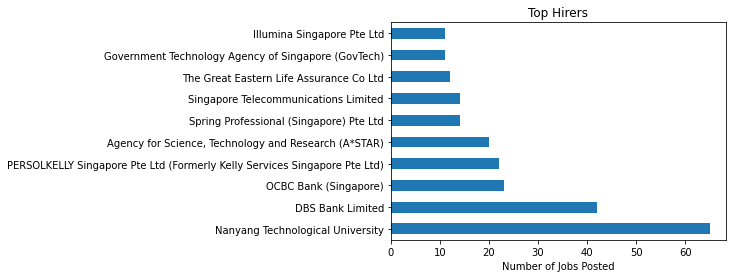

In [125]:
df['Companies'].value_counts().nlargest(10).plot(kind= 'barh')
plt.title('Top Hirers')
plt.xlabel('Number of Jobs Posted')

In [ ]:
df.groupby(by='Companies').value_counts().nlargest(10).plot(kind= 'barh')

Text(0.5, 0, 'Number of Jobs Posted')

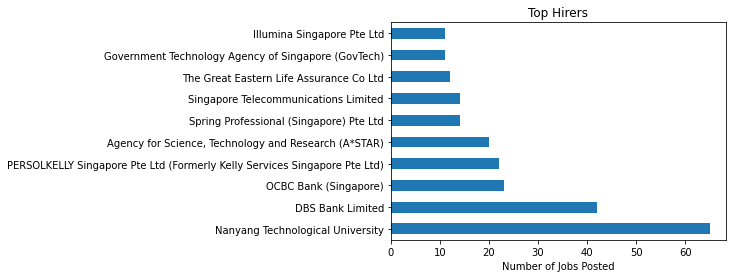

In [125]:
df['Companies'].value_counts().nlargest(10).plot(kind= 'barh')
plt.title('Top Hirers')
plt.xlabel('Number of Jobs Posted')

In [126]:
df[df['Companies'] == 'Nanyang Technological University']

,Job Title,Companies,Location,Date posted,Other information,Job Description,Pay_average,Qualifications,Position,Employment Type,Years of Experience,Skills Needed,Number of Skills
45,Research Associate (Computer Science/IT) (R000...,Nanyang Technological University,Singapore,NaT,"Junior Executive Bachelor's Degree, Post Gradu...",A Research Associate position is currently ava...,NaN,"Bachelor's Degree , Diploma , Post Graduate Di...",Junior Executive,Full-Time,2.0,"Python , SQL",2
59,Research Fellow (Computer Science/IT) (R00006578),Nanyang Technological University,Singapore,NaT,"Junior Executive Bachelor's Degree, Post Gradu...",A Research Fellow position is currently availa...,NaN,"Bachelor's Degree , Diploma , Post Graduate Di...",Junior Executive,Full-Time,6.0,"Python , SQL",2
62,Research Fellow (Computer Science/IT) (R00006585),Nanyang Technological University,Singapore,NaT,"Junior Executive Bachelor's Degree, Post Gradu...",A Research Fellow position is currently availa...,NaN,"Bachelor's Degree , Diploma , Post Graduate Di...",Junior Executive,Full-Time,6.0,"Python , SQL",2
105,Senior Research Fellow (Infrasound) (R00006535),Nanyang Technological University,Singapore,NaT,"Senior Executive Bachelor's Degree, Post Gradu...",The Earth Observatory in Singapore (EOS) at NT...,NaN,"Bachelor's Degree , Diploma , Post Graduate Di...",Senior Executive,Full-Time,NaN,"Python , SQL , Git",3
172,Research Associate (Computer Vision and Artifi...,Nanyang Technological University,Singapore,NaT,Senior Executive Master's Degree 1 year Full-T...,A Research Associate position is available in ...,NaN,Master's Degree,Senior Executive,Full-Time,NaN,"Python , deep learning , artificial intelligen...",5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,Research Fellow (R00007077),Nanyang Technological University,Singapore,2021-09-10,Junior Executive Doctorate (PhD) 1 year Full-T...,Research Fellow (Data Science/Machine Learning...,NaN,Doctorate (PhD),Junior Executive,Full-Time,NaN,"artificial intelligence , SQL , cloud",3
455,Research Fellow (Visual Analytics) (R00007303),Nanyang Technological University,Singapore,2021-09-10,Manager Professional Certificate/NiTEC 3 years...,A Research Fellow position is available in the...,NaN,"Professional Certificate , NiTEC",Manager,Full-Time,3.0,"Python , deep learning , computer vision",3
474,Research Associate (R00005124),Nanyang Technological University,Singapore,2021-09-10,Junior Executive Master's Degree 1 year Full-T...,S-Lab for Advanced Intelligence invites applic...,4250.0,Master's Degree,Junior Executive,Full-Time,NaN,"deep learning , cloud , computer vision",3
475,Research Associate (R00005125),Nanyang Technological University,Singapore,2021-09-10,Junior Executive Master's Degree 1 year Full-T...,S-Lab for Advanced Intelligence invites applic...,4250.0,Master's Degree,Junior Executive,Full-Time,NaN,"deep learning , cloud , computer vision",3


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Job Title            480 non-null    object        
 1   Companies            480 non-null    object        
 2   Location             480 non-null    object        
 3   Date posted          409 non-null    datetime64[ns]
 4   Other information    480 non-null    object        
 5   Job Description      480 non-null    object        
 6   Pay_average          101 non-null    float64       
 7   Qualifications       480 non-null    object        
 8   Position             480 non-null    object        
 9   Employment Type      480 non-null    object        
 10  Years of Experience  316 non-null    float64       
 11  Skills Needed        480 non-null    object        
 12  Number of Skills     480 non-null    int32         
dtypes: datetime64[ns](1), float64(2), i

In [128]:
df.iloc[45]['Job Description']

'A Research Associate position is currently available in the College of Business, Nanyang Business School. We are looking for an experienced data engineer to join our team and you will use various methods to transform raw data into useful data systems. This includes developing algorithms and conducting statistical analysis. Overall, your goal is to develop data systems in alignment with business goals.To succeed in this data engineering position, you should have strong analytical skills and the ability to integrate data /data streams from different sources. Data engineer skills also include familiarity with apt programming languages and knowledge of machine learning methods. If you are detail-oriented, with excellent organizational skills and experience in this field, we’d like to hear from you.Job ResponsibilitiesCo-evaluate business needs and objectivesIdentify opportunities for data acquisitionBuild data systems and pipelinesBuild algorithms and prototypesAnalyze and organize raw da

In [129]:
df[df['Companies'] == 'The Great Eastern Life Assurance Co Ltd']

,Job Title,Companies,Location,Date posted,Other information,Job Description,Pay_average,Qualifications,Position,Employment Type,Years of Experience,Skills Needed,Number of Skills
32,Senior Data Scientist - (Job Number: 210001EN),The Great Eastern Life Assurance Co Ltd,Singapore,2021-09-09,"Senior Executive Bachelor's Degree, Post Gradu...",Job PurposeReporting to the Lead of Data Scien...,NaN,"Bachelor's Degree , Diploma , Post Graduate Di...",Senior Executive,Full-Time,5.0,"Python , SQL",2
38,Principal Data Scientist - (2100008O),The Great Eastern Life Assurance Co Ltd,Singapore,2021-09-09,"Senior Manager Bachelor's Degree, Post Graduat...","Job PurposeAt Great Eastern, we are building a...",NaN,"Bachelor's Degree , Diploma , Post Graduate Di...",Senior Manger,Full-Time,15.0,"Python , SQL",2
39,IT Solutions Architect (Data) - ( 21000022 ),The Great Eastern Life Assurance Co Ltd,Singapore,NaT,"Senior Manager Bachelor's Degree, Post Graduat...",Job PurposeThe solution architect (data) role ...,NaN,"Bachelor's Degree , Diploma , Post Graduate Di...",Senior Manger,Full-Time,10.0,"Python , cloud , Hadoop , Hive",4
43,Data Scientist - Job Number: 2100018T,The Great Eastern Life Assurance Co Ltd,Singapore,2021-09-09,"Junior Executive Bachelor's Degree, Post Gradu...",Job PurposeReporting to the Lead of Data Scien...,3500.0,"Bachelor's Degree , Diploma , Post Graduate Di...",Junior Executive,Full-Time,2.0,"Python , SQL",2
85,"Lead IT Business Analyst (Data Mapper), IT - I...",The Great Eastern Life Assurance Co Ltd,Singapore,2021-09-09,"Senior Executive Bachelor's Degree, Post Gradu...",Job PurposeThe candidate is expected to work o...,NaN,"Bachelor's Degree , Diploma , Post Graduate Di...",Senior Executive,Full-Time,4.0,"SQL , Hadoop",2
87,Senior Analyst - Campaign Analytics - (2100014V),The Great Eastern Life Assurance Co Ltd,Singapore,2021-09-09,"Senior Executive Diploma, Advanced/Higher/Grad...",Job PurposeTo provide analytics support for th...,NaN,"Bachelor's Degree , Diploma , Advanced/Higher/...",Senior Executive,Full-Time,2.0,"Python , SQL",2
122,Principal Big Data Engineer - (210000AJ),The Great Eastern Life Assurance Co Ltd,Singapore,2021-09-09,"Senior Executive Bachelor's Degree, Post Gradu...","Job PurposeAt Great Eastern, we are building a...",NaN,"Bachelor's Degree , Diploma , Post Graduate Di...",Senior Executive,Full-Time,5.0,"Python , artificial intelligence , SQL , cloud...",10
143,IT Solutions Architect (Data) - (21000022),The Great Eastern Life Assurance Co Ltd,Singapore,2021-09-09,"Senior Manager Bachelor's Degree, Post Graduat...",Job PurposeThe solution architect (data) role ...,8250.0,"Bachelor's Degree , Diploma , Post Graduate Di...",Senior Manger,Full-Time,10.0,"Python , cloud , Hadoop , Hive",4
169,IT Big Data Platform Architect - (210001H7),The Great Eastern Life Assurance Co Ltd,Singapore,2021-09-07,"Senior Manager Bachelor's Degree, Post Graduat...",Job PurposeThe Big Data Platform Architect is ...,NaN,"Bachelor's Degree , Diploma , Post Graduate Di...",Senior Manger,Full-Time,NaN,"Python , cloud , Hadoop",3
177,Senior Data Scientist - (2100018T),The Great Eastern Life Assurance Co Ltd,Singapore,2021-09-03,"Senior Manager Bachelor's Degree, Post Graduat...",Job Purpose Reporting to the Lead of Data Scie...,NaN,"Bachelor's Degree , Diploma , Post Graduate Di...",Senior Manger,Full-Time,3.0,"Python , SQL",2


Text(0.5, 0, 'Number of Jobs Posted')

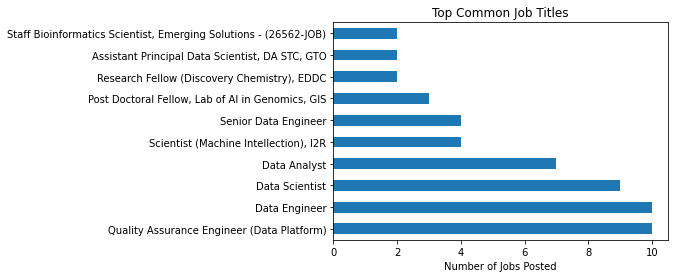

In [130]:
df['Job Title'].value_counts().nlargest(10).plot(kind= 'barh')
plt.title('Top Common Job Titles')
plt.xlabel('Number of Jobs Posted')

Text(0.5, 0, 'Number of Jobs Posted')

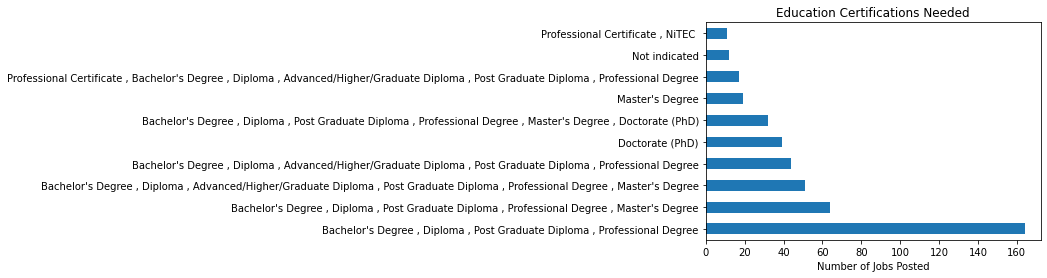

In [131]:
df['Qualifications'].value_counts().nlargest(10).plot(kind= 'barh')
plt.title('Education Certifications Needed')
plt.xlabel('Number of Jobs Posted')

In [132]:
df['Number of Skills'].value_counts()

2     209
3      85
4      48
6      43
5      38
7      23
8      21
9       7
10      6
Name: Number of Skills, dtype: int64

Text(0.5, 0, 'Number of Jobs Posted')

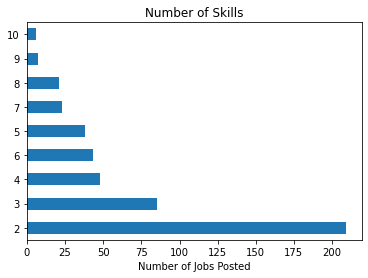

In [133]:
df['Number of Skills'].value_counts().plot(kind= 'barh')
plt.title('Number of Skills')
plt.xlabel('Number of Jobs Posted')

Text(0.5, 0, 'Number of Jobs Posted')

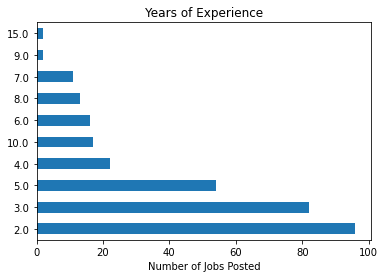

In [134]:
df['Years of Experience'].value_counts().nlargest(10).plot(kind= 'barh')
plt.title('Years of Experience')
plt.xlabel('Number of Jobs Posted')

In [135]:
import seaborn as sns

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Job Title            480 non-null    object        
 1   Companies            480 non-null    object        
 2   Location             480 non-null    object        
 3   Date posted          409 non-null    datetime64[ns]
 4   Other information    480 non-null    object        
 5   Job Description      480 non-null    object        
 6   Pay_average          101 non-null    float64       
 7   Qualifications       480 non-null    object        
 8   Position             480 non-null    object        
 9   Employment Type      480 non-null    object        
 10  Years of Experience  316 non-null    float64       
 11  Skills Needed        480 non-null    object        
 12  Number of Skills     480 non-null    int32         
dtypes: datetime64[ns](1), float64(2), i

C:\Users\Randy\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Randy\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


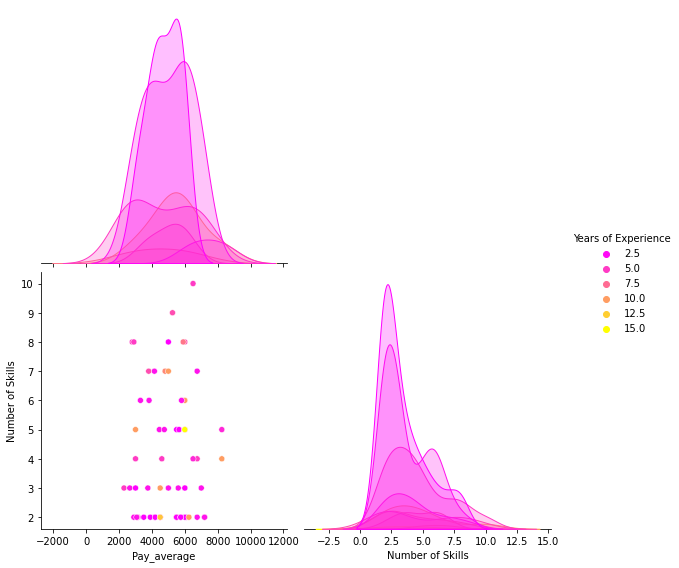

In [164]:
sns.pairplot(data = df,hue='Years of Experience' ,corner  =True, palette= 'spring',height =4)

C:\Users\Randy\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


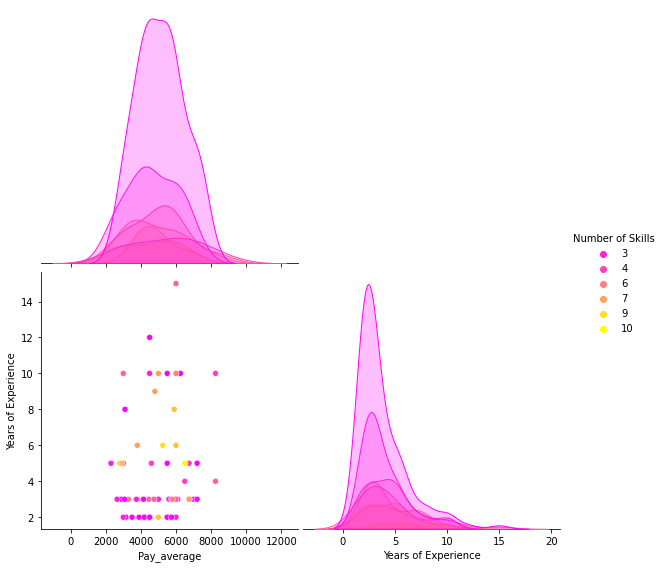

In [165]:
sns.pairplot(data = df,hue='Number of Skills', corner  =True, palette= 'spring',height =4)

<AxesSubplot:>

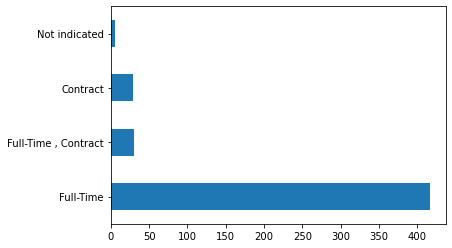

In [139]:
df["Employment Type"].value_counts().plot(kind='barh')

<AxesSubplot:>

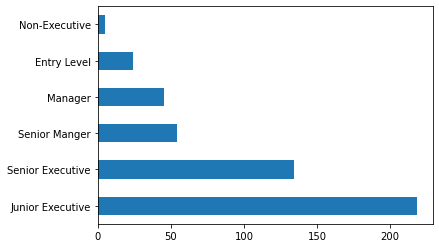

In [140]:
df["Position"].value_counts().plot(kind='barh')

Text(0, 0.5, 'Average Pay')

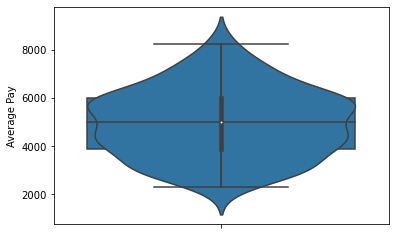

In [181]:
sns.boxplot(y = df['Pay_average'])
sns.violinplot(y = df['Pay_average'])
plt.ylabel("Average Pay")

In [141]:
list(df[df['Position'] == 'Junior Executive'].sample()['Job Description'])

["Assistant Principal Data Scientist - Research (Predictive Maintenance)Background:The Data Analytics Strategic Technology Centre (DA STC) is a Corporate R&amp;D centre for Data Analytics &amp; Artificial Intelligence that aims to develop key data analytics technologies to support ST Engineering's global growth plans across all our business sectorsJob Description:Join a team of researchers to explore and develop new or improved analytical techniques through both organic and collaborative R&amp;D effortsDevelop POCs to demonstrate viability of DA/AI technologies for our different MRO businessesDemonstrate research efficacy by publishing conference papers, journal articles and other means of asserting IP ownershipWork with our Group Engineering Centre and lines of businesses to translate research outcomes into commercially viable products or servicesRequirements:Master's or PhD in Science/Engineering/Mathematics with at least 3 to 5 years of working experience in data analyticsIn-depth t

## NLP Time

In [142]:
#Cleaning Data

In [143]:
#Stop-Word removal
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords

In [144]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Randy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [145]:
stop_words = set(stopwords.words('english'))

In [146]:
print(stop_words)

{"hadn't", 'couldn', 'once', 'were', 'will', "you've", 'does', 'had', "that'll", 'what', 't', 'ain', 'into', 'won', 'yourselves', 'mightn', 'on', "she's", "wouldn't", 've', 'ma', 'did', 'while', 'than', 'but', 'below', 'not', "shan't", 'if', 'd', 'can', 'their', 'be', 'at', 'up', 'aren', "haven't", 's', 'hasn', 'they', 'few', 'down', 'is', 'do', 'very', 'out', 'them', "mustn't", 'his', "you're", 'am', 'doesn', 'same', 'are', 'own', 'itself', 'against', 'been', 'we', 'only', 'haven', 'shouldn', "weren't", 'so', 'shan', 'both', 're', 'until', 'll', 'her', 'more', 'our', 'by', 'herself', 'your', 'to', 'wouldn', 'yourself', 'himself', 'before', 'any', 'during', 'he', 'myself', 'i', 'that', "mightn't", 'it', "you'll", 'all', 'o', 'because', "hasn't", 'no', 'you', 'off', 'such', "aren't", 'and', 'yours', 'as', 'wasn', 'of', 'whom', 'don', 'hadn', "won't", "couldn't", 'having', 'being', 'after', 'above', 'in', 'now', 'ourselves', 'or', "needn't", 'just', 'who', 'him', 'for', 'my', "shouldn't"

In [147]:
#Removing stop words

In [148]:
#additional stopwords to eliminate
additional_stop_words = ['amp']
stop_words = stop_words.union(set(additional_stop_words))

In [149]:
df['Processed_JD'] = df['Job Description'].apply(lambda x : ' '.join([word for word in word_tokenize(x) if word.lower() not in stop_words]))

In [150]:
df.head()

,Job Title,Companies,Location,Date posted,Other information,Job Description,Pay_average,Qualifications,Position,Employment Type,Years of Experience,Skills Needed,Number of Skills,Processed_JD
0,Data Analyst - Financial Markets,AMUNDI SINGAPORE LIMITED,Singapore,2021-09-06,"Entry Level Bachelor's Degree, Post Graduate D...",Job descriptionYou will be part of the Data Sc...,4000.0,"Bachelor's Degree , Diploma , Post Graduate Di...",Entry Level,Contract,NaN,"Python , Pandas",2,Job descriptionYou part Data Science team with...
1,Data Scientist,Singapore Pools (Private) Limited,Singapore,NaT,Excellent Benefits Learning Organisation Gi...,We are looking for a passionate and profession...,NaN,"Bachelor's Degree , Diploma , Post Graduate Di...",Junior Executive,Full-Time,2.0,"Python , SQL",2,looking passionate professional Data Scientist...
2,Junior / Senior Data Scientist,LUXOFT INFORMATION TECHNOLOGY (SINGAPORE) PTE....,Singapore,NaT,Junior Executive Not Specified 2 years Full-Ti...,Project DescriptionWASP System Enhancement - i...,NaN,Not indicated,Junior Executive,Full-Time,2.0,"Python , Hadoop , Kafka , computer vision , NLP",5,Project DescriptionWASP System Enhancement - i...
3,Junior Data Engineer,VOLT,Singapore,NaT,"Entry Level Bachelor's Degree, Post Graduate D...",Executive - Data &amp; InsightsLooking for a n...,6000.0,"Bachelor's Degree , Diploma , Post Graduate Di...",Entry Level,Contract,NaN,"Python , SQL , Azure , Spark , Hive , Scala",6,Executive - Data & ; InsightsLooking new membe...
4,Data Scientist,Phillip Securities Pte Ltd,Singapore,2021-09-11,"Manager Bachelor's Degree, Post Graduate Diplo...",Responsibilities:Understand the business probl...,3825.0,"Bachelor's Degree , Diploma , Post Graduate Di...",Manager,Full-Time,3.0,"Python , SQL , Hadoop , Spark , Scala , NLP",6,Responsibilities : Understand business problem...


In [151]:
#End of removing stop words

In [152]:
#Bag of words model for top 10 most frequent terms

In [153]:
from sklearn.feature_extraction.text import CountVectorizer
bag_of_words_model = CountVectorizer(max_features= 10)
df_top_ten_words = pd.DataFrame(bag_of_words_model.fit_transform(df['Processed_JD']).todense())
df_top_ten_words.columns = sorted(bag_of_words_model.vocabulary_)
df_top_ten_words.head()

,analytics,business,computer,data,engineering,experience,learning,science,team,work
0,0,1,0,7,1,0,1,3,3,3
1,2,1,0,11,0,2,1,1,2,3
2,2,0,1,5,0,1,1,1,0,1
3,1,2,1,15,4,2,2,2,2,1
4,1,5,0,6,1,3,1,4,1,0


In [154]:
#Using a TF-IDF to find out the common used terms

In [155]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_model = TfidfVectorizer(max_features=10)
df_top_ten_words_tfidf = pd.DataFrame(tfidf_model.fit_transform(df['Processed_JD']).todense())
df_top_ten_words_tfidf.columns = sorted(tfidf_model.vocabulary_)
df_top_ten_words_tfidf.head()

,analytics,business,computer,data,engineering,experience,learning,science,team,work
0,0.000000,0.135869,0.000000,0.733662,0.132502,0.000000,0.143343,0.319101,0.378379,0.400224
1,0.215839,0.103504,0.000000,0.878273,0.000000,0.151529,0.109198,0.081030,0.192165,0.304889
2,0.433323,0.000000,0.174878,0.801472,0.000000,0.152107,0.219229,0.162677,0.000000,0.204034
3,0.080357,0.154139,0.064860,0.891771,0.300641,0.112829,0.162619,0.120670,0.143087,0.075674
4,0.129263,0.619871,0.000000,0.573801,0.120903,0.272246,0.130795,0.388221,0.115085,0.000000


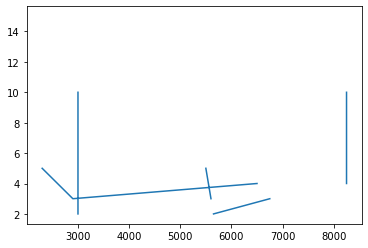

In [156]:
plt.plot(df.Pay_average, df['Years of Experience'])

In [157]:
np.mean(df['Pay_average'])

4990.59405940594

In [184]:
df['Pay_average'].describe()

count     101.000000
mean     4990.594059
std      1419.540117
min      2300.000000
25%      3900.000000
50%      5000.000000
75%      6000.000000
max      8250.000000
Name: Pay_average, dtype: float64

In [182]:
df[df['Pay_average'] < np.mean(df['Pay_average'])].head()

Job Title              50
Companies              50
Location               50
Date posted            43
Other information      50
Job Description        50
Pay_average            50
Qualifications         50
Position               50
Employment Type        50
Years of Experience    30
Skills Needed          50
Number of Skills       50
Processed_JD           50
dtype: int64

In [159]:
df.iloc[0]['Job Description']

'Job descriptionYou will be part of the Data Science team within Amundi Intermediation. Amundi Intermediation is the trading department of Amundi, and is in charge of executing on the financial markets all orders requested by portfolio managers, on all asset classes.The objective of the Data Science team is to identify the different sources of market data that can be used to support the activity, and to propose analyses and models for traders, management and compliance.You will work 50% on Data Analysis reports with Python and 50% on long term projects like the creation of new tools to help traders to improve their execution performance. If you are interested, you will be able to review a Data Science / Machine Learning model developed in the team, but this will not be the primary focus of your work.Develop automated performance dashboards on the department activity, with python and a web based business intelligence software;Calculate and optimize the execution added value of trading o

In [160]:
df.iloc[4]['Job Description']

'Responsibilities:Understand the business problems end to end and document them in a way that the business can comprehendTranslate the business problems into a data science problems by analyzing the feasibility, data availability, solution scalability, as well as bottleneck &amp; potential risk if have anyEvaluate, propose, design and implement data science solutions to address business problemsPresent the analytical findings to management and business stakeholders on the trends, patterns and opportunitiesExplore new technologies especially open source suitable for big data implementation &amp; AI adoptionReport project progresses in charge\u200bRequirements:Degree in Engineering/Science/MathsAt least 3 years working experience in the field of analytics, data science, designing and implementing statistical, applied machine learning and NLP with real-world projectsStrong background in handling data and programmingWorking experience with SQL and Python is a mustWorking experience with Sc

In [161]:
df.info(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Job Title            480 non-null    object        
 1   Companies            480 non-null    object        
 2   Location             480 non-null    object        
 3   Date posted          409 non-null    datetime64[ns]
 4   Other information    480 non-null    object        
 5   Job Description      480 non-null    object        
 6   Pay_average          101 non-null    float64       
 7   Qualifications       480 non-null    object        
 8   Position             480 non-null    object        
 9   Employment Type      480 non-null    object        
 10  Years of Experience  316 non-null    float64       
 11  Skills Needed        480 non-null    object        
 12  Number of Skills     480 non-null    int32         
 13  Processed_JD         480 non-null  

df.to_csv('Cleaned_file.csv', index = True)